In [1]:
import os
os.chdir("C:/Users/Marco/Desktop/nova files/Machine Learning")
print (os.getcwd())

C:\Users\Marco\Desktop\nova files\Machine Learning


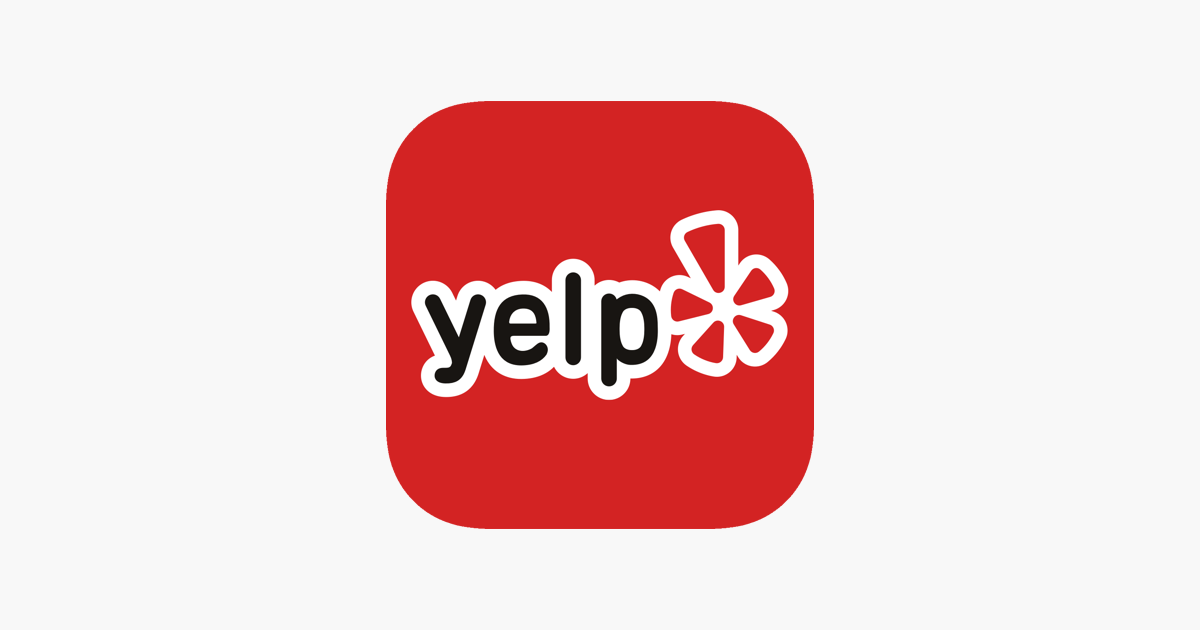

In [2]:
from PIL import Image

myImage = Image.open("yelp.png")
myImage

# **Machine Learning Project - Yelp**

Marco Maccagli - 40912


# Code

0. From Business Idea to Machine Learning Problem
    1. About yelp and it business
    2. Business opportunity/problem
    3. Recommender systems
    4. Application to business case
    5. Ensuring succesfull implemnation of a machine learning pipeline
1. Initialisation
2. Data Collection
    1. df_business
    2. df_checkin
    3. df_reviews
    4. df_users
3. Data Preparation
    1. Pre-cleaning df_business and transforming it to df_restaurants
    2. Obtaining reviews per user, since column review_count in df_user is not accurate
    3. Merging newly obtained and correct reviews (df_reviews_per_user) per user with df_user 
    4. Merging df_checkin and df_restaurants on column "business_id"
    5. Merging df_user and df_reviews on column "user_id"
4. Data Exploration
    1. Business Overview
    2. Reviews Overview
    3. Restaurants
    4. Users

5. Models: 
    1. Sentiment Analysis
    2. Sentiment Analysis for a single restaurants (which key words drive their ratings)
    3. Personalized recommender system with SVD (threshold: 30 reviews)
    4. Naive Recommender for new users (handling the sparsity problem)
6. Conclusions
    1. Implications of the model results 
    2. Going forward from here 
    


# 0. From Business Idea to Machine Learning Problem

### 0.A About yelp and its business
Yelp is an internet company founded in 2004 by two former PayPal employees. Yelp hosts and markets its website and app which are platforms for crowd-sourced reviews about local businesses and has several social network features. Yelp users can submit reviews (one to five stars) on a business or its products, react to reviews, plan events, and ask business owner questions in an open Q&A. In addition, business owners can provide basic information, such as business hours, contact information, special deals, and advertise their location. Yelp added features such as ordering and scheduling via the app (e.g. manicures, flower deliveries) and making reservations in restaurants. There is also a cash-back feature and customer loyalty programs via yelp. As of 31st March 2020, yelp compromises 5.1 million businesses with 211 million cumulative reviews, more than 96 million unique visitors on desktop and mobile, and 562,000 paying advertising locations. Yelp generates revenue (USD 1,014 million –  FY2019) by advertisement on its platform, mainly driven by service companies (home, local, auto, professionals and other) which accounts for more than 50% of advertising revenue, when a user views yelp’s platform, which is mainly driven by restaurants, cafes and nightlife (more than 60% of page views).


### 0.B Business opportunity/problem
Just like other communication service firms, such as Google and Facebook, yelp generates its revenues mainly by digital advertisement (96% of revenues – FY 2019). Yelp is especially used in the United States; geographically speaking 98% of revenues are generated in the U.S. Since yelp is a platform about local businesses, the advertisement consists of local businesses. In its 2020 Local Advertising Forecast, BIA Advisory Services estimates that USD 71 billion will be spend on U.S. local digital media advertisement in 2020. In 2023, U.S. local digital advertisement (USD 94 billion) is set to overtake U.S. local traditional media advertisement (USD 86 billion). Accounting for Corona, the overall amount of money spend on U.S. local advertisement will certainly decrease considerably, however, the transformation from U.S. local traditional media advertisement to U.S. local digital media advertisement will accelerate.

Therefore, it is essential for yelp to stay relevant as digital platform with high user activity and develop new strategies to generate leads for businesses. A substantial mechanic in doing so, is to have a strong recommender system which matches users with their respective most-likely fitting businesses.

### 0.C Recommender systems 
Through the everyday use of smartphones, tablets, and wearables, we are used to having an app dedicated to solving any possible problem there might be or at least to making our daily lives more convenient. Moreover, we almost always enjoy those services free of charge. But how can a business model be sustainable when a company offers its products and services for free?

Well, typically those kind of platform businesses attract a lot of users, who in turn create a huge amount of data. Online businesses ranging from e-commerce retailers to streaming and entertainment apps monetize their user data either through direct sales of data or through personalized display of ads inside the apps.
So, in order to fuel revenue growth, online platform businesses need to ensure that users interact with their apps frequently and also repeatedly. A popular way to increase user engagement is the creation of a top-notch recommender system. In fact, once well implemented, recommender systems significantly influence customer engagement and choices made. According to the Netflix example, 80% of user choices are influenced by some sort of algorithm-based recommendation.  

We also wanted to provide yelp with another channel to generate review taking into account that revenues generated by marketing will likely decrease due to the Covid-19 pandemic. More information on this can be found below.


### 0.D Application to business case
Hence, our suggestion for yelp is to implement a model-based collaborative filtering recommender system based on matrix factorization between user and restaurant ratings, in order to generate traffic on the website and to monetize the increased amount of customer data via advertisement.

Machine Learning is needed in this case to make use of the high volume of complex user interactions with listings on yelp. The recommender system will allow us to derive meaningful recommendations from unstructured data 
Humans are typically bad at making decisions. Even when presented with a list of all restaurant options in the area, users still struggle to decide where to eat or to order. Our recommender system personalizes those options and facilitates decision making. Previous interactions between users and restaurants will serve as the data input. The use of a recommender system triggers a self-enforcing effect, as increased user engagement will generate more and more data to further train the model on and to improve predictions. 

With sparse dataset of restaurants in Arizona we face two typical problems when establishing a recommender system: cold-start problem and popularity bias. By combining two recommender systems, a naïve approach for new user and a more personalized systems for regular yelp users, we overcome both.

When a user has more than 30 reviews, we are confident to serve him a personalized experience. Based on matrix factorization with SVD (model-based collaborative filtering) we build a recommender model which can predict potential ratings for restaurants which the user did not rate yet. We correct the predicted rating with matrix factorization by the average rating of the user to account for the sparsity.

To provide a new yelp user recommendation for restaurants, another approach is necessary. We do not have sufficient data to determine his preferences by comparing him with peers. Therefore, we recommend him the best restaurants in his region accounting for newly opened restaurants. This is a simple approach which can yield intuitive and powerful results. 

In course of the recommender systems implementation, we also analyzed the review text via a sentiment analysis. The sentiment analysis leaves us with a whole new business propsal:

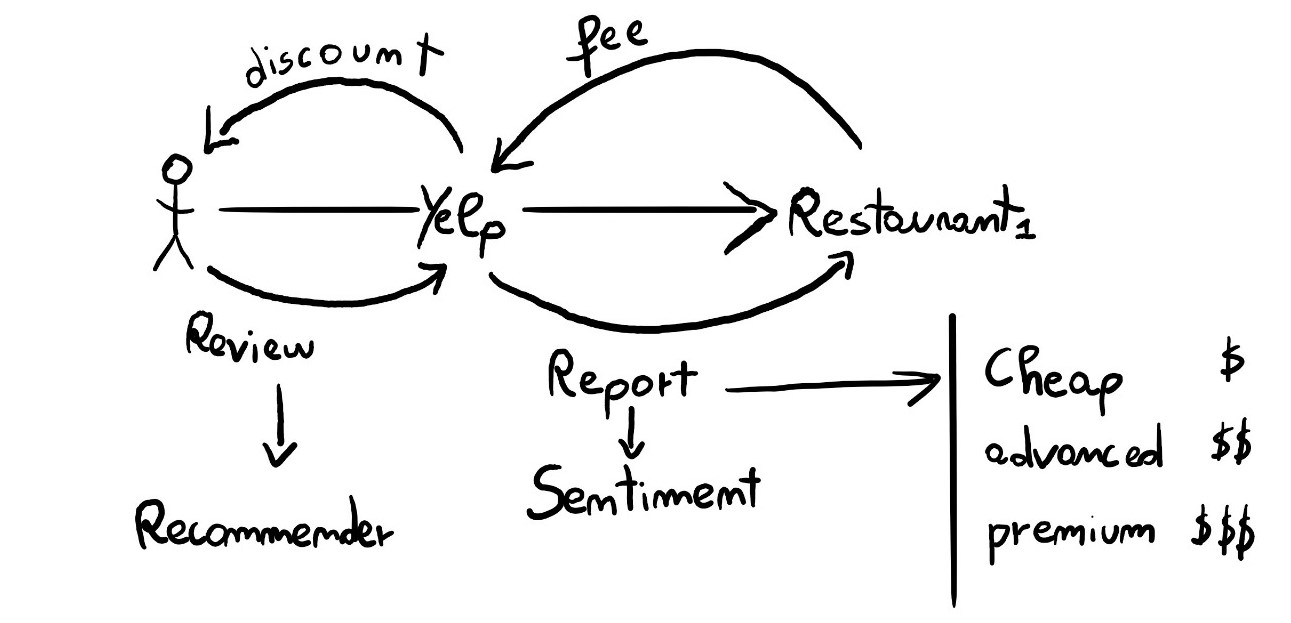

In [5]:
from PIL import Image

myImage = Image.open("plan.jpeg")
myImage

### 0.D Application to business case (continouing)
Our business propsal should add an addtional revenue channel for yelp. With the help of an automated sentiment analysis we are able to get lots of insights from restaurants. Especially we get feedback from user which have visited restaurants. Together with the ratings we can analyze which words have the highest magnitude on a rating. When we translate our knowledge about a word's magnitude into practice, we know which factors drive ratings. Thus, we can give reports and recommendations to restaurant to increase their rating, have more satisfied customers, and become more popular. Meaningful reviews are essential for this business propsal. Thus, we need to ensure that user leave reviews. Basically, this system similtanously needs to improve interactions between clients and restaurants. This can have a postive spell-over effect to tradtional revenue streams, such as advertisment, since user interaction and time spent on yelp are essential metrices for advertisment revenue generation and, therefore, for yelp's success.

For exmaple, user(1) will use yelp to find its first restaurant through a simple, naive recommender system that recommends a restaurant based on the best rated restaurants for a given city and category. If User(1) wants to eat a pizza in Phoenix, the first recommender will simply tell him which are the best candidates, ordered by average rating and number of ratings. Once the user has eaten at its first restaurant (restaurant(1)), yelp will notify that if user(1) leaves a review, yelp will provide a discount valid for the next time the user(1) will go to a restaurant through Yelp (restaurant(1) or another restaurant(n)). By implementing this strategy, users are incentivized to: <br>

   1. leave reviews 
   2. book again through Yelp

Once the user(1) has enough review, Yelp will also start to recommend personalized experiences through a second recommender system.<br>
On the business side, costs related to the discounts can be covered by selling to the restaurants in its database an analysis on the reviews left by the users. The report will help the restaurants to improve where users feels that they are not good, and to understand what kind of strategies leads to good reviews. Yelp will provide the business its personal business_id, and the restaurant manager will be able to access a complete report on its business. There are types of reports:<br>

   1. cheap: only the sentiment, with no explanations
   2. advanced: a data analyst from yelp helps to understand the report and gives advices
   3. premium: the data analyst performs a in-depth analysis of the restaurant and also a peer evaluation with respect to the main competitors of the restaurant
   
To implement this Idea we need:

   1. A naive recommender for new users
   2. A personalized recommender for active users
   3. A sentiment analysis model to create the reports

### 0.E Ensuring succesfull implemnation of a machine learning pipeline
With this being said, we also need to verify that our proposed solutions are suitable for machine learning applications.

We apply our machine learning model in form of a sentiment analysis to a regular and reoccurring pattern of written reviews that relate to a star rating for a business or a product listed on the platform. The goal is to identify a pattern of certain words that have a particularly high positive or negative influence on the ratings. Generally, words around staff, such as smile, friendly and casual could be associated with a positive influence on ratings, whereas words with a negative influence on ratings usually focus on dishes served at the venue. Also, the recommender machine learning model is all about a reappearing pattern from the data: ratings. Ratings are plentiful and are given irregular based i.a. based on the user preferences.

To find meaningful representation of the data, vectorization techniques need to be applied to words in the context of the sentiment analysis. Furthermore, the assumption was made that on a scale of 0-5, with 5 being the most positive, ratings of 4 and higher serve as positive labels, whereas ratings of 3 and lower are deemed negative labels. The reasoning behind that is that due to the high offer and competition of restaurants in the Phoenix area, users are unlikely to even consider a business that is rated with less than 4 stars.

Success can be defined through an increased number of users on yelp, an increased user retention rate (users using yelp search repeatedly), and increased user interaction. More traffic on the website will enable yelp to grow revenue generated through ads on the website. Also, our extension of yelp's tradtional business with advertisment via establishing a new revenue channel with automatically generated reports (based on the sentiment analysis) can contribute to yelp's overall business sucess. Especially in current periods where many economies face recession and companies are in desperate search to cut costs, it is essential for a business depentend on advertisment to establish additional sales channels. Overall, this can especially contribute to yelp's mid-term success.

With regards to the model, the recommender system showed that restaurants are successfully recommended according to the tastes of the users. As evaluation metrics for the sentiment analysis, we use the F1 score since it is important to identify both, the ratings that were correctly predicted as positive measured at all predicted positive ratings, as well as measured at all real positive ratings. To address the overfitting problem, we later used accuracy score as additional evaluation metrics. Overall, the improved sentiment analysis model performed well, when tested on selected businesses. 

# 1. Initialisation

In [6]:
#packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import random
import itertools
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



%matplotlib inline
plt.style.use('fivethirtyeight')
plt.style.use('bmh')

import random
random.seed(42)

In [7]:
import os
os.chdir("C:/Users/Marco/Desktop/nova files/Machine Learning")
print (os.getcwd())

C:\Users\Marco\Desktop\nova files\Machine Learning


# 2. Data Collection
## 2.A df_business

In [8]:
business_json_path = 'yelp_academic_dataset_business.json'
df_business = pd.read_json(business_json_path, lines=True) #read json
df_business.head()

,business_id,full_address,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,type
0,rncjoVoEFUJGCUoC1JgnUA,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",True,"[Accountants, Professional Services, Tax Servi...",Peoria,3,Peoria Income Tax Service,[],-112.241596,AZ,5.0,33.581867,business
1,0FNFSzCFP_rGUoJx8W7tJg,"2149 W Wood Dr\nPhoenix, AZ 85029",True,"[Sporting Goods, Bikes, Shopping]",Phoenix,5,Bike Doctor,[],-112.105933,AZ,5.0,33.604054,business
2,3f_lyB6vFK48ukH6ScvLHg,"1134 N Central Ave\nPhoenix, AZ 85004",True,[],Phoenix,4,Valley Permaculture Alliance,[],-112.073933,AZ,5.0,33.460526,business
3,usAsSV36QmUej8--yvN-dg,"845 W Southern Ave\nPhoenix, AZ 85041",True,"[Food, Grocery]",Phoenix,5,Food City,[],-112.085377,AZ,3.5,33.392210,business
4,PzOqRohWw7F7YEPBz6AubA,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",True,"[Food, Bagels, Delis, Restaurants]",Glendale Az,14,Hot Bagels & Deli,[],-112.200264,AZ,3.5,33.712797,business


## 2.B df_checkin

In [9]:
checkin_json_path = 'yelp_academic_dataset_checkin.json'
df_checkin = pd.read_json(checkin_json_path , lines=True)
df_checkin.head()

,checkin_info,type,business_id
0,"{'11-3': 17, '8-5': 1, '15-0': 2, '15-3': 2, '...",checkin,KO9CpaSPOoqm0iCWm5scmg
1,"{'0-5': 1, '2-6': 2, '2-5': 3, '3-6': 1, '3-5'...",checkin,oRqBAYtcBYZHXA7G8FlPaA
2,"{'13-4': 1, '7-4': 1, '15-3': 1, '18-5': 1, '2...",checkin,6cy2C9aBXUwkrh4bY1DApw
3,"{'13-5': 1, '17-6': 1, '15-1': 1, '20-0': 1, '...",checkin,D0IB17N66FiyYDCzTlAI4A
4,"{'16-2': 1, '14-5': 1, '12-5': 2, '15-4': 1, '...",checkin,HLQGo3EaYVvAv22bONGkIw


## 2.C df_reviews

In [10]:
review_json_path = 'yelp_academic_dataset_review.json'
df_reviews = pd.read_json(review_json_path , lines=True)
df_reviews.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw


## 2.D df_user

In [11]:
user_json_path = 'yelp_academic_dataset_user.json'
df_user = pd.read_json(user_json_path , lines=True)
df_user.head()

,votes,user_id,name,average_stars,review_count,type
0,"{'funny': 0, 'useful': 7, 'cool': 0}",CR2y7yEm4X035ZMzrTtN9Q,Jim,5.0,6,user
1,"{'funny': 0, 'useful': 1, 'cool': 0}",_9GXoHhdxc30ujPaQwh6Ew,Kelle,1.0,2,user
2,"{'funny': 0, 'useful': 1, 'cool': 0}",8mM-nqxjg6pT04kwcjMbsw,Stephanie,5.0,2,user
3,"{'funny': 0, 'useful': 2, 'cool': 0}",Ch6CdTR2IVaVANr-RglMOg,T,5.0,2,user
4,"{'funny': 0, 'useful': 0, 'cool': 0}",NZrLmHRyiHmyT1JrfzkCOA,Beth,1.0,1,user


# 3. Data preparation

## 3.A Pre-cleaning df_business and transforming it to df_restaurants

In [12]:
new_columns = df_business.categories.apply(pd.Series) # breaking open the lists in the column "categories"
df_business = df_business.join(new_columns) #adding new columns containing strings from the lists to the existing dataframe 
df_business.columns = df_business.columns.astype(str) #converting column names into strings
df_business = df_business.replace(np.nan, '', regex=True) # replace all the nan values in the file with empty string value (" ").  this is IMPORTANT for the next step, to be able to concatenate strings. Can be changed later if this causes problems. 
df_business['category'] = df_business['0'].str.cat(df_business[['1', '2', "3", "4", "5", "6", "7", "8","9"]], sep=' ') #concatenate strings with empty string value (" "). 
del df_business['0']
del df_business['1']
del df_business['2']
del df_business['3']
del df_business['4']
del df_business['5']
del df_business['6']
del df_business['7']
del df_business['8']
del df_business['9'] # delete columns that are no longer necessary. Keep column "categories" with list values for now. 

df_restaurants = df_business[df_business.category.str.contains("Restaurants")] #create dataframe only containing business that are classified as some sort of restaurants.
df_restaurants.head()

Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>],
      dtype='object')

## 3.B Obtaining reviews per user, since column review_count in df_user is not accurate

In [14]:
df_reviews_per_user = pd.DataFrame(df_reviews["user_id"].value_counts(), columns = ['user_id'])
df_reviews_per_user['user_id1'] = df_reviews_per_user.index
df_reviews_per_user.columns = ['reviews_per_user', 'user_id']
df_reviews_per_user

,reviews_per_user,user_id
fczQCSmaWF78toLEmb0Zsw,588,fczQCSmaWF78toLEmb0Zsw
90a6z--_CUrl84aCzZyPsg,506,90a6z--_CUrl84aCzZyPsg
0CMz8YaO3f8xu4KqQgKb9Q,473,0CMz8YaO3f8xu4KqQgKb9Q
4ozupHULqGyO42s3zNUzOQ,442,4ozupHULqGyO42s3zNUzOQ
joIzw_aUiNvBTuGoytrH7g,392,joIzw_aUiNvBTuGoytrH7g
...,...,...
jaagaD0kk6dI4KFzyYxjfA,1,jaagaD0kk6dI4KFzyYxjfA
ErrroUDh4zFCt9eP-heq3w,1,ErrroUDh4zFCt9eP-heq3w
1Bpx5u0HFMbT9xWNdXR7OA,1,1Bpx5u0HFMbT9xWNdXR7OA
MeOB5NvOPRZaHkO89Yr6ag,1,MeOB5NvOPRZaHkO89Yr6ag


## 3.C Merging newly obtained and correct reviews (df_reviews_per_user) per user with df_user 

In [15]:
df_user = pd.merge(df_user, df_reviews_per_user, on='user_id', how='left')
df_user

,votes,user_id,name,average_stars,review_count,type,reviews_per_user
0,"{'funny': 0, 'useful': 7, 'cool': 0}",CR2y7yEm4X035ZMzrTtN9Q,Jim,5.00,6,user,3
1,"{'funny': 0, 'useful': 1, 'cool': 0}",_9GXoHhdxc30ujPaQwh6Ew,Kelle,1.00,2,user,2
2,"{'funny': 0, 'useful': 1, 'cool': 0}",8mM-nqxjg6pT04kwcjMbsw,Stephanie,5.00,2,user,1
3,"{'funny': 0, 'useful': 2, 'cool': 0}",Ch6CdTR2IVaVANr-RglMOg,T,5.00,2,user,1
4,"{'funny': 0, 'useful': 0, 'cool': 0}",NZrLmHRyiHmyT1JrfzkCOA,Beth,1.00,1,user,1
...,...,...,...,...,...,...,...
43868,"{'funny': 72, 'useful': 117, 'cool': 47}",SG56r_eAdyK9aad9H8dT4g,Geoff,3.63,139,user,1
43869,"{'funny': 2, 'useful': 6, 'cool': 3}",brlWQgZoM0_rF3QmmrA99g,Matthew,5.00,3,user,1
43870,"{'funny': 0, 'useful': 0, 'cool': 0}",bbGCiK43lyi6oqLGNHLMaQ,tanya,3.00,1,user,1
43871,"{'funny': 3, 'useful': 5, 'cool': 6}",-iUnAEpltJi0MCjmWrPu9w,Brian,4.50,10,user,3


## 3.D Merging df_checkin and df_restaurants on column "business_id"

In [16]:
#merge df_checkin and df_restaurants on columnn ["business_id"]

df_restaurants_checkin = pd.merge(df_restaurants, df_checkin, on='business_id', how='left')

,business_id,full_address,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,type_x,category,checkin_info,type_y
0,PzOqRohWw7F7YEPBz6AubA,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",True,"[Food, Bagels, Delis, Restaurants]",Glendale Az,14,Hot Bagels & Deli,[],-112.200264,AZ,3.5,33.712797,business,Food Bagels Delis Restaurants,"{'6-6': 1, '11-4': 1, '6-2': 1, '18-5': 1, '21...",checkin
1,qarobAbxGSHI7ygf1f7a_Q,"891 E Baseline Rd\nSuite 102\nGilbert, AZ 85233",True,"[Sandwiches, Restaurants]",Gilbert,10,Jersey Mike's Subs,[],-111.812007,AZ,3.5,33.378839,business,Sandwiches Restaurants,"{'13-3': 2, '11-5': 1, '19-5': 1, '19-4': 1, '...",checkin
2,gA5CuBxF-0CnOpGnryWJdQ,"519 W Thomas Rd\nPhoenix, AZ 85013",True,"[Mexican, Restaurants]",Phoenix,5,La Paloma Mexican Food,[],-112.081361,AZ,4.0,33.480105,business,Mexican Restaurants,"{'9-4': 1, '11-4': 2, '11-1': 1, '13-5': 1, '1...",checkin
3,JxVGJ9Nly2FFIs_WpJvkug,"14418 N Scottsdale Rd\nSuite 181\nScottsdale, ...",True,"[Pizza, Restaurants]",Scottsdale,55,Sauce,[],-111.926272,AZ,4.0,33.617459,business,Pizza Restaurants,"{'11-3': 6, '13-4': 3, '16-5': 3, '16-1': 1, '...",checkin
4,Jj7bcQ6NDfKoz4TXwvYfMg,"8941 N Black Canyon Hwy\nPhoenix, AZ 85021",True,"[Burgers, Restaurants]",Phoenix,23,Fuddruckers,[],-112.116243,AZ,4.0,33.566989,business,Burgers Restaurants,"{'13-5': 2, '11-2': 4, '16-5': 3, '16-3': 1, '...",checkin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4498,QzXFdjIbFRGhzL83goPPLA,"7000 E Mayo Blvd\nPhoenix, AZ 85054",True,"[Asian Fusion, Restaurants]",Phoenix,56,Elephant Bar,[],-111.930014,AZ,3.5,33.655682,business,Asian Fusion Restaurants,"{'10-2': 1, '13-5': 2, '13-4': 2, '7-6': 1, '1...",checkin
4499,avhNXYkbGmTpUMDGw-imvg,"1395 S Arizona Avenue\nChandler, AZ 85248",True,"[Sandwiches, Restaurants]",Chandler,3,Subway,[],-111.841340,AZ,2.5,33.285308,business,Sandwiches Restaurants,"{'23-4': 1, '9-6': 1, '11-2': 1, '7-4': 1, '11...",checkin
4500,TCIVUf1frqLehZbaUnuQzQ,"1158 W Washington St\nSte 101\nTempe, AZ 85281",True,"[Mexican, Restaurants]",Tempe,18,Filiberto's Mexican Food,[],-111.955643,AZ,3.0,33.442375,business,Mexican Restaurants,"{'12-4': 2, '12-2': 1, '15-2': 1, '6-3': 3, '1...",checkin
4501,F3tqTcfKnljJcSyyqN0bbw,"8489 E McDonald Dr\nScottsdale, AZ 85250",True,"[Mexican, Restaurants]",Scottsdale,25,Los Favoritos Taco Shop,[],-111.897904,AZ,3.5,33.523891,business,Mexican Restaurants,"{'12-3': 1, '6-4': 2, '11-0': 1, '8-2': 1, '6-...",checkin


## 3.E Merging df_user and df_reviews on column "user_id"

In [17]:
df_user_reviews = pd.merge(df_reviews, df_user, on='user_id', how='left')
#votes_x are the votes on the single review (based on review_id)
#votes_y are the votes on all of the reviews a user made (based on user_id

,votes_x,user_id,review_id,stars,date,text,type_x,business_id,votes_y,name,average_stars,review_count,type_y,reviews_per_user
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,"{'funny': 331, 'useful': 1034, 'cool': 322}",Jason,3.72,376.0,user,247.0
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,"{'funny': 2, 'useful': 0, 'cool': 0}",Paul,5.00,2.0,user,1.0
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,"{'funny': 0, 'useful': 3, 'cool': 0}",Nicole,4.33,3.0,user,2.0
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,"{'funny': 18, 'useful': 75, 'cool': 36}",lindsey,4.29,31.0,user,17.0
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,"{'funny': 3, 'useful': 32, 'cool': 8}",Roger,3.25,28.0,user,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229902,"{'funny': 0, 'useful': 0, 'cool': 0}",6e7pZofhDuIlD_rX2oYirQ,f9JaiNg_FMoPNWxt7MlbZQ,2,2011-04-14,I really wanted to like this place because it'...,review,vnffHkFJbmd-J3OaBbK2Eg,"{'funny': 18, 'useful': 111, 'cool': 23}",Lisa,3.72,82.0,user,42.0
229903,"{'funny': 0, 'useful': 2, 'cool': 0}",dDNfSFT0VApxPmURclX6_g,QDWRP1pW5r0huIBAoGmFyg,1,2011-01-23,My husband I stayed here for two nights. Of c...,review,l5oUrgQ190l8CcN8uzd_pA,"{'funny': 29, 'useful': 50, 'cool': 12}",Jonquil,2.53,47.0,user,1.0
229904,"{'funny': 0, 'useful': 0, 'cool': 0}",M5wHt6Odh1k5v0tIjqd8DQ,JmR3yk7JlS1LVVxtIc3xBQ,4,2010-10-11,Cool atmosphere. A lot of beers on tap and goo...,review,-EctXOb3B7T177jGYUhjVA,"{'funny': 2, 'useful': 2, 'cool': 1}",Amanda,4.25,4.0,user,3.0
229905,"{'funny': 1, 'useful': 2, 'cool': 0}",jopndPrv-H5KW2CfScnw9A,z5b2p5TbCg0uaIiIe8n62w,3,2011-01-18,I have to take a star off for the spotty servi...,review,YQvg0JCGRFUkb6reMMf3Iw,"{'funny': 378, 'useful': 678, 'cool': 451}",Valerie,3.56,196.0,user,130.0


In [18]:
df_restaurants_checkin.head()

,business_id,full_address,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,type_x,category,checkin_info,type_y
0,PzOqRohWw7F7YEPBz6AubA,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",True,"[Food, Bagels, Delis, Restaurants]",Glendale Az,14,Hot Bagels & Deli,[],-112.200264,AZ,3.5,33.712797,business,Food Bagels Delis Restaurants,"{'6-6': 1, '11-4': 1, '6-2': 1, '18-5': 1, '21...",checkin
1,qarobAbxGSHI7ygf1f7a_Q,"891 E Baseline Rd\nSuite 102\nGilbert, AZ 85233",True,"[Sandwiches, Restaurants]",Gilbert,10,Jersey Mike's Subs,[],-111.812007,AZ,3.5,33.378839,business,Sandwiches Restaurants,"{'13-3': 2, '11-5': 1, '19-5': 1, '19-4': 1, '...",checkin
2,gA5CuBxF-0CnOpGnryWJdQ,"519 W Thomas Rd\nPhoenix, AZ 85013",True,"[Mexican, Restaurants]",Phoenix,5,La Paloma Mexican Food,[],-112.081361,AZ,4.0,33.480105,business,Mexican Restaurants,"{'9-4': 1, '11-4': 2, '11-1': 1, '13-5': 1, '1...",checkin
3,JxVGJ9Nly2FFIs_WpJvkug,"14418 N Scottsdale Rd\nSuite 181\nScottsdale, ...",True,"[Pizza, Restaurants]",Scottsdale,55,Sauce,[],-111.926272,AZ,4.0,33.617459,business,Pizza Restaurants,"{'11-3': 6, '13-4': 3, '16-5': 3, '16-1': 1, '...",checkin
4,Jj7bcQ6NDfKoz4TXwvYfMg,"8941 N Black Canyon Hwy\nPhoenix, AZ 85021",True,"[Burgers, Restaurants]",Phoenix,23,Fuddruckers,[],-112.116243,AZ,4.0,33.566989,business,Burgers Restaurants,"{'13-5': 2, '11-2': 4, '16-5': 3, '16-3': 1, '...",checkin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4498,QzXFdjIbFRGhzL83goPPLA,"7000 E Mayo Blvd\nPhoenix, AZ 85054",True,"[Asian Fusion, Restaurants]",Phoenix,56,Elephant Bar,[],-111.930014,AZ,3.5,33.655682,business,Asian Fusion Restaurants,"{'10-2': 1, '13-5': 2, '13-4': 2, '7-6': 1, '1...",checkin
4499,avhNXYkbGmTpUMDGw-imvg,"1395 S Arizona Avenue\nChandler, AZ 85248",True,"[Sandwiches, Restaurants]",Chandler,3,Subway,[],-111.841340,AZ,2.5,33.285308,business,Sandwiches Restaurants,"{'23-4': 1, '9-6': 1, '11-2': 1, '7-4': 1, '11...",checkin
4500,TCIVUf1frqLehZbaUnuQzQ,"1158 W Washington St\nSte 101\nTempe, AZ 85281",True,"[Mexican, Restaurants]",Tempe,18,Filiberto's Mexican Food,[],-111.955643,AZ,3.0,33.442375,business,Mexican Restaurants,"{'12-4': 2, '12-2': 1, '15-2': 1, '6-3': 3, '1...",checkin
4501,F3tqTcfKnljJcSyyqN0bbw,"8489 E McDonald Dr\nScottsdale, AZ 85250",True,"[Mexican, Restaurants]",Scottsdale,25,Los Favoritos Taco Shop,[],-111.897904,AZ,3.5,33.523891,business,Mexican Restaurants,"{'12-3': 1, '6-4': 2, '11-0': 1, '8-2': 1, '6-...",checkin


# 4. Data Exploration

## 4.A Businesses

To get a better understandig about the yelp dataset we used the inital data exploration to analyze the overall restaurant market.

Text(0.5, 1.0, 'Rating across all type of industry')

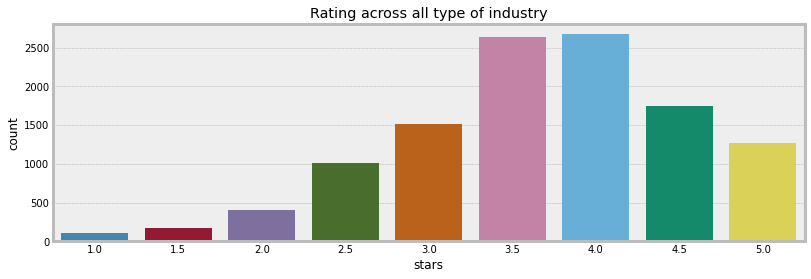

In [19]:
# the majority of the rating are between 3.5 and 4.0
plt.figure(figsize=(12,4))
ax = sns.countplot(df_business['stars'])
plt.title('Rating across all type of industry')

In [20]:
#which is the most rated industry (is the food industry)
df_all_ratings = df_business.groupby('category').sum().sort_values('stars', ascending = False)
df_all_ratings.head()

,open,review_count,longitude,stars,latitude
category,,,,,
Mexican Restaurants,455.0,15331,-59139.229186,1863.0,17671.245095
Pizza Restaurants,240.0,6616,-31473.435584,944.5,9410.315991
Food Coffee & Tea,186.0,4571,-25198.419681,845.0,7535.356522
Hotels & Travel Event Planning & Services Hotels,224.0,3406,-25425.527476,747.0,7599.210878
Beauty & Spas Nail Salons,198.0,1270,-22283.761308,698.5,6664.348176
Chinese Restaurants,177.0,4401,-22177.687866,691.0,6626.249864
Food Ice Cream & Frozen Yogurt,134.0,2980,-18479.738998,618.0,5526.485922
,168.0,792,-19829.721699,610.0,5931.134617
Restaurants,151.0,964,-22623.211643,605.5,6764.755886


Let's check the distribution of ratings, which are essential to build a recommender. It is alsp helpful to compare it with other industries to get a better understanding.

Text(0.5, 1.0, 'Rating distribution across Food industry')

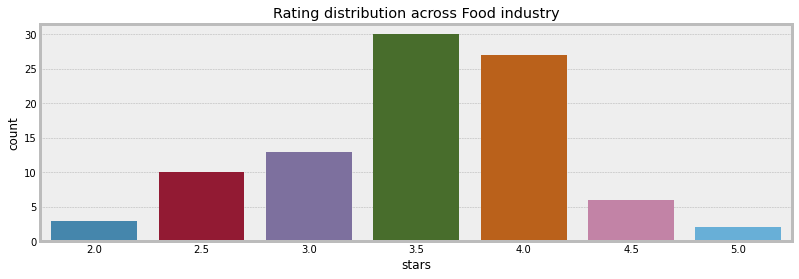

In [21]:
# let us explore the ratings distributions in the food industry (almost no skewness)
df_food = df_business[df_business['category'].str.contains('food')]

plt.figure(figsize=(12,4))
ax = sns.countplot(df_food['stars'])
plt.title('Rating distribution across Food industry')

In [25]:
df_food.head()

,business_id,full_address,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,type,category
207,e8Eke5v8pXw-PuRCu2uPjg,Talking Stick Resort\n9800 E Indian Bend Rd\nS...,True,"[Seafood, Cajun/Creole, Restaurants]",Scottsdale,26,Ocean Trail,[],-111.865693,AZ,5.0,33.538873,business,Seafood Cajun/Creole Restaurants
286,Yw86Jnab9ixke9xJ5pLhMQ,"5516 W Glendale Ave\nGlendale, AZ 85301",True,"[Seafood, Restaurants]",Glendale,21,Pete's Fish & Chips,[],-112.178325,AZ,2.5,33.538579,business,Seafood Restaurants
319,OypZxwm-jS9QfUwgBmzeyw,"2576 E Camelback Rd\nPhoenix, AZ 85016",False,"[Seafood, Restaurants]",Phoenix,20,Steamers Genuine Seafood,[],-112.025525,AZ,3.0,33.509728,business,Seafood Restaurants
359,z4KFTJQsAdxqMZA7Fx0A9A,"2051 W Warner Rd\nSte 13\nChandler, AZ 85224",True,"[Seafood, Dim Sum, Chinese, Restaurants]",Chandler,85,C-Fu Gourmet Restaurant,[],-111.877429,AZ,3.0,33.335046,business,Seafood Dim Sum Chinese Restaurants
493,7EFNxJUVQtF3jS1P6qsweg,"200 S Arizona Ave\nChandler, AZ 85225",True,"[Seafood, Restaurants]",Chandler,9,Pirate's Fish & Chips,[],-111.841900,AZ,3.0,33.300428,business,Seafood Restaurants


## 4.B Reviews

To build a senitment analysis, it is essential to get a better understanding about the words and text in the reviews.

In [36]:
df_reviews.head(5)

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw


In [39]:
df_reviews['date']= pd.to_datetime(df_reviews['date']) 

In [40]:
df_reviews['month'] = df_reviews['date'].dt.month

In [41]:
df_reviews_month = pd.DataFrame(df_reviews['month'].sort_values(ascending = False))

Text(0.5, 1.0, 'Monthly number of reviews - Arizona Food Industry')

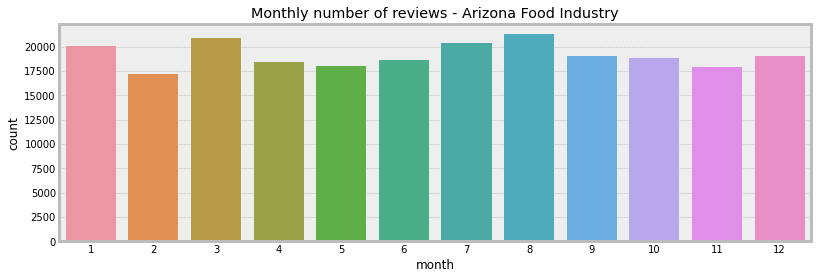

In [42]:
plt.figure(figsize=(12,4))
ax = sns.countplot(df_reviews_month['month'])
plt.title("Monthly number of reviews - Arizona Food Industry")

#since arizona has no localized turism period, commercial activities have no particularly busy peak

In [43]:
df_restaurants_reviews = pd.merge(df_restaurants, df_reviews, on='business_id', how='left')

In [44]:
df_reviews['dayofweek_name'] = df_reviews['date'].dt.weekday_name
df_reviews[['date','dayofweek_name']].head()

,date,dayofweek_name
0,2011-01-26,Wednesday
1,2011-07-27,Wednesday
2,2012-06-14,Thursday
3,2010-05-27,Thursday
4,2012-01-05,Thursday


Text(0.5, 1.0, '')

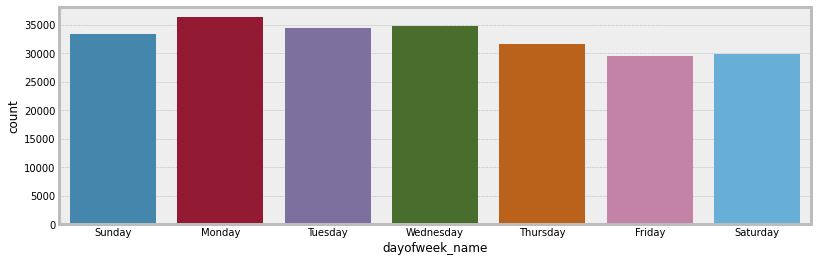

In [45]:
plt.figure(figsize=(12,4))
ax = sns.countplot(df_reviews['dayofweek_name'], order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title("")

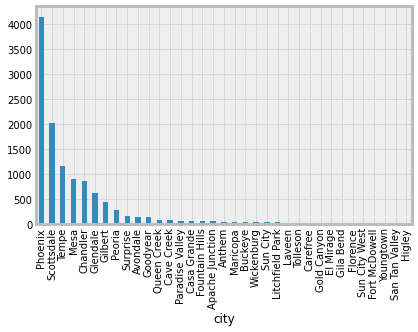

In [46]:
df_business.city.groupby(df_business.city).count().sort_values()[::-1][:35].plot(kind="bar")
# what we can understand form here is that Yelp business covers mostly phoenix
# top 5: phoenix, scottsdale, tempe, mesa, chandler

## 4.C Resturants

In [50]:
#where are the most resturants located
df_restaurants_checkin["city"].value_counts()

Phoenix             1629
Scottsdale           702
Tempe                458
Chandler             356
Mesa                 352
Glendale             249
Gilbert              150
Peoria               110
Surprise              60
Avondale              59
Goodyear              49
Casa Grande           31
Queen Creek           24
Cave Creek            24
Paradise Valley       22
Apache Junction       21
Fountain Hills        20
Wickenburg            19
Buckeye               18
Anthem                15
Maricopa              15
Sun City              14
Litchfield Park       12
Tolleson              11
Carefree              10
Gold Canyon            9
Laveen                 9
El Mirage              7
Gila Bend              5
Florence               5
Sun City West          4
Youngtown              4
Fort McDowell          3
San Tan Valley         3
Guadalupe              3
Morristown             3
Sun Lakes              3
Coolidge               3
Higley                 2
Ahwatukee              2


## 4.D Users

In [52]:
votes_x=df_user_reviews["votes_x"]

In [53]:
cool=[]
for x in np.arange(0,len(votes_x)):
  cool.append(votes_x[x]["cool"])
len(cool)==len(votes_x)


True

In [54]:
funny=[]
for x in np.arange(0, len(votes_x)):
  funny.append(votes_x[x]["funny"])
len(funny)==len(cool)==len(votes_x)

True

In [55]:
useful=[]
for x in np.arange(0, len(votes_x)):
  useful.append(votes_x[x]["useful"])
len(useful)==len(votes_x)

True

In [56]:
df_user_reviews["cool"]=cool

In [57]:
df_user_reviews["funny"]=funny

In [58]:
df_user_reviews["useful"]=useful

In [59]:
df_user_reviews.drop("votes_x", inplace=True, axis=1)

In [60]:
df_user_reviews.head()

,user_id,review_id,stars,date,text,type_x,business_id,votes_y,name,average_stars,review_count,type_y,reviews_per_user,cool,funny,useful
0,rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,"{'funny': 331, 'useful': 1034, 'cool': 322}",Jason,3.72,376.0,user,247.0,2,0,5
1,0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,"{'funny': 2, 'useful': 0, 'cool': 0}",Paul,5.00,2.0,user,1.0,0,0,0
2,0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,"{'funny': 0, 'useful': 3, 'cool': 0}",Nicole,4.33,3.0,user,2.0,0,0,1
3,uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,"{'funny': 18, 'useful': 75, 'cool': 36}",lindsey,4.29,31.0,user,17.0,1,0,2
4,vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,"{'funny': 3, 'useful': 32, 'cool': 8}",Roger,3.25,28.0,user,14.0,0,0,0


# 4.E Restaurant Location Visualisation

The recommender should respect the user's location. If the suggested restaurants are 100 miles from the user's location, the recommendations are basically useless. Therefore, it makes sense to better understand the geographical distribution of the restaurants over the Pheonix area.

In [61]:
#conda install -c conda-forge GDAL
#conda install -c conda-forge Fiona
#conda install -c conda-forge Shapely
#conda install -c conda-forge GeoPandas
#conda install -c conda-forge PySAL
#conda install -c conda-forge Missingno
#conda install -c conda-forge RTree

In [62]:
df_phoenix = pd.DataFrame(df_business[df_business.values =='Phoenix'])
#picking just the phoenix business

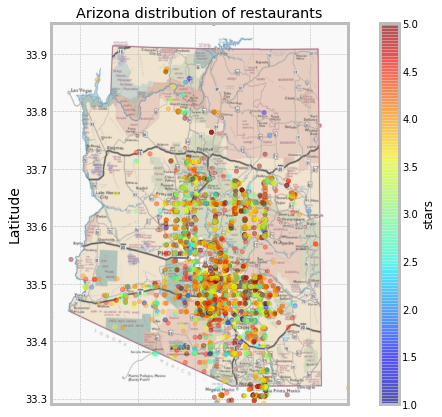

In [69]:
import matplotlib.image as mpimg
phoenix_img=mpimg.imread('phoenix.jpeg')
ax = df_phoenix.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),c="stars", cmap=plt.get_cmap("jet"),colorbar=True, alpha=0.4,)
plt.imshow(phoenix_img, extent=[-112.351050, -111.833200, 33.290910, 33.953171], alpha=0.7,cmap=plt.get_cmap("jet"))
plt.title("Arizona distribution of restaurants")
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.show()

# 5. Models

# 5.A Sentiment Analysis: predicting ratings from reviews 

Creating a model to predict reviews allows us to see how a given word in a review affects the ratings. Using data from all the businesses, we can answer to questions such as "price counts more than service?", "having an outdoor space is something really valued by clients?" A rating >=4 is considered as "good", while a rating <4 is considered bad. The reasoning behind this classification is that, given the high number of restaurants, and so the high competition level,  we assume that a user will not choose to go to a restaurant that has less than 4 stars, as there will be many others with superior ratings. for this reasong, a score below 4 is already considered a bad score

Once created a general model, we can also build one for just one restaurant. By looking at the coefficients of the words in the reviews of that particular restaurant, we can directly see what are the drivers of the ratings. Yelp can sell the info to the restaurant and monetize from it. For this analysis, we will use a restaurant with at least 50 reviews. 

### Text cleaning

In [70]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
# extract stars
stars=df_user_reviews.stars
# extract reviews
reviews=df_user_reviews.text

df=pd.DataFrame({"reviews":reviews, "stars":stars})
df.head()

,reviews,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
2,love the gyro plate. Rice is so good and I als...,4
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,General Manager Scott Petello is a good egg!!!...,5


In [72]:
# count the words in a review

df['word_count'] = df['reviews'].apply(lambda x: len(str(x).split(" ")))
df[['reviews','word_count']].head()

,reviews,word_count
0,My wife took me here on my birthday for breakf...,160
1,I have no idea why some people give bad review...,256
2,love the gyro plate. Rice is so good and I als...,16
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",75
4,General Manager Scott Petello is a good egg!!!...,85


In [73]:
# count the number of characters

df['char_count'] = df['reviews'].str.len() # this also includes spaces
df[['reviews','char_count']].head()

,reviews,char_count
0,My wife took me here on my birthday for breakf...,889
1,I have no idea why some people give bad review...,1345
2,love the gyro plate. Rice is so good and I als...,76
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",419
4,General Manager Scott Petello is a good egg!!!...,469


In [74]:
#average word length

def avg_word(sentence):
    words = sentence.split()
    if len(words)!=0:
        return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['reviews'].apply(lambda x: avg_word(x))
df[['reviews','avg_word']].head()

,reviews,avg_word
0,My wife took me here on my birthday for breakf...,4.670968
1,I have no idea why some people give bad review...,4.225681
2,love the gyro plate. Rice is so good and I als...,3.812500
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",4.486842
4,General Manager Scott Petello is a good egg!!!...,4.453488


In [75]:
#calculate number of stopwords

import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['reviews'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['reviews','stopwords']].head()

,reviews,stopwords
0,My wife took me here on my birthday for breakf...,59
1,I have no idea why some people give bad review...,114
2,love the gyro plate. Rice is so good and I als...,5
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",28
4,General Manager Scott Petello is a good egg!!!...,40


In [76]:
# number of special characters

df['hastags'] = df['reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['reviews','hastags']].head()

,reviews,hastags
0,My wife took me here on my birthday for breakf...,0
1,I have no idea why some people give bad review...,0
2,love the gyro plate. Rice is so good and I als...,0
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",0
4,General Manager Scott Petello is a good egg!!!...,0


In [77]:
# number of numerics

df['numerics'] = df['reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['reviews','numerics']].head()

,reviews,numerics
0,My wife took me here on my birthday for breakf...,1
1,I have no idea why some people give bad review...,0
2,love the gyro plate. Rice is so good and I als...,0
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",0
4,General Manager Scott Petello is a good egg!!!...,0


In [78]:
# number of uppercase

df['upper'] = df['reviews'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['reviews','upper']].head()

,reviews,upper
0,My wife took me here on my birthday for breakf...,3
1,I have no idea why some people give bad review...,6
2,love the gyro plate. Rice is so good and I als...,1
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2
4,General Manager Scott Petello is a good egg!!!...,2


### Text Pre-Processing

In [79]:
df.head()

,reviews,stars,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,My wife took me here on my birthday for breakf...,5,160,889,4.670968,59,0,1,3
1,I have no idea why some people give bad review...,5,256,1345,4.225681,114,0,0,6
2,love the gyro plate. Rice is so good and I als...,4,16,76,3.812500,5,0,0,1
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,75,419,4.486842,28,0,0,2
4,General Manager Scott Petello is a good egg!!!...,5,85,469,4.453488,40,0,0,2


In [80]:
#lowercase

df['reviews'] = df['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['reviews'].head()

0    my wife took me here on my birthday for breakf...
1    i have no idea why some people give bad review...
2    love the gyro plate. rice is so good and i als...
3    rosie, dakota, and i love chaparral dog park!!...
4    general manager scott petello is a good egg!!!...
Name: reviews, dtype: object

In [81]:
#removing punctuation

df['reviews'] = df['reviews'].str.replace('[^\w\s]','')
df['reviews'].head()

0    my wife took me here on my birthday for breakf...
1    i have no idea why some people give bad review...
2    love the gyro plate rice is so good and i also...
3    rosie dakota and i love chaparral dog park its...
4    general manager scott petello is a good egg no...
Name: reviews, dtype: object

In [82]:
#removing stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['reviews'].head()

0    wife took birthday breakfast excellent weather...
1    idea people give bad reviews place goes show p...
2    love gyro plate rice good also dig candy selec...
3    rosie dakota love chaparral dog park convenien...
4    general manager scott petello good egg go deta...
Name: reviews, dtype: object

In [83]:
# having a look at frequency of words

freq = pd.Series(' '.join(df['reviews']).split()).value_counts()[-10:]
freq

trylet                                                                                                                                                                             1
matusalem                                                                                                                                                                          1
hooknilla                                                                                                                                                                          1
reassessed                                                                                                                                                                         1
callingcalling                                                                                                                                                                     1
httpwwwmaricopagovenvsvcenvwebapptabsresultsaspxnavigatedfrombusinessresultsdrilldownmc_perm_id

In [84]:
#spelling correction
#this will take some time to run, if we want to skip this passage, probably most of the mispelled words are goin to be deleted
#in the following steps.

"""
from textblob import TextBlob

df['reviews'].apply(lambda x: str(TextBlob(x).correct()))

"""

"\nfrom textblob import TextBlob\n\ndf['reviews'].apply(lambda x: str(TextBlob(x).correct()))\n\n"

In [85]:
#rare words removal

freq = pd.Series(' '.join(df['reviews']).split()).value_counts()
freq

good                                                                                                                                                                               152325
place                                                                                                                                                                              150375
food                                                                                                                                                                               139482
great                                                                                                                                                                              114919
like                                                                                                                                                                               114691
                                                                      

In [86]:
freq=freq[freq>6]
freq

good        152325
place       150375
food        139482
great       114919
like        114691
             ...  
erred            7
carabbas         7
marin            7
swayze           7
danes            7
Length: 36670, dtype: int64

In [87]:
freq = list(freq.index)

In [88]:
freq=np.array(freq)

In [89]:
#remove all the words that appear less than 7 times. 
#this should get rid also of eventual typos and should decrease the noise in future models

for review in reviews:
    for word in review:
        review=review.replace(word, "")

In [90]:
df.head()

,reviews,stars,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,wife took birthday breakfast excellent weather...,5,160,889,4.670968,59,0,1,3
1,idea people give bad reviews place goes show p...,5,256,1345,4.225681,114,0,0,6
2,love gyro plate rice good also dig candy selec...,4,16,76,3.812500,5,0,0,1
3,rosie dakota love chaparral dog park convenien...,5,75,419,4.486842,28,0,0,2
4,general manager scott petello good egg go deta...,5,85,469,4.453488,40,0,0,2


In [91]:
reviews_split=[]
for n in np.arange(0, len(df["reviews"])):
    reviews_split.append(df["reviews"][n].split())
    
df["reviews"]=reviews_split

In [92]:
df["reviews"].head()

0    [wife, took, birthday, breakfast, excellent, w...
1    [idea, people, give, bad, reviews, place, goes...
2    [love, gyro, plate, rice, good, also, dig, can...
3    [rosie, dakota, love, chaparral, dog, park, co...
4    [general, manager, scott, petello, good, egg, ...
Name: reviews, dtype: object

In [93]:
df["reviews"].tail()

229902    [really, wanted, like, place, close, home, hon...
229903    [husband, stayed, two, nights, course, room, w...
229904    [cool, atmosphere, lot, beers, tap, good, food...
229905    [take, star, spotty, service, received, last, ...
229906                                           [cool, yo]
Name: reviews, dtype: object

In [94]:
# lemmatization

In [95]:
 # pip install -U textblob

In [96]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [97]:
from textblob import Word

df['reviews'] = df['reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))
df['reviews'].head()

0    wife took birthday breakfast excellent weather...
1    idea people give bad review place go show plea...
2    love gyro plate rice good also dig candy selec...
3    rosie dakota love chaparral dog park convenien...
4    general manager scott petello good egg go deta...
Name: reviews, dtype: object

In [98]:
# sentiment analysis
# from textblob import TextBlob
# df['sentiment']=df["reviews"].apply(lambda x: TextBlob(x).sentiment[0])

In [99]:
# df['subjectivity'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment[1])

In [100]:
# df.head()

,reviews,stars,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,sentiment,subjectivity
0,wife took birthday breakfast excellent weather...,5,160,889,4.670968,59,0,1,3,0.438889,0.664120
1,idea people give bad review place go show plea...,5,256,1345,4.225681,114,0,0,6,0.170000,0.616667
2,love gyro plate rice good also dig candy selec...,4,16,76,3.812500,5,0,0,1,0.600000,0.600000
3,rosie dakota love chaparral dog park convenien...,5,75,419,4.486842,28,0,0,2,0.566667,0.800000
4,general manager scott petello good egg go deta...,5,85,469,4.453488,40,0,0,2,0.361111,0.788889


By manually checking the review, the stars and the sentiment score, this kind of sentiment analysis does not seem to be particularly precise. As it can be seen in the table above, sentiment scores do not provide a concise explanation for star ratings. In df.head(), senitment (score form -1 to 1) varys greatly for top reviews. This model seems to be not fit to be used going on from now.

### Sentiment Analysis: general model that uses all the reviews from all the restaurants

Now, we want to try to build anothe sentiment analysis which actually provides insight and were we can link words to certain reviews. Thus, where we can see the magnitude of words associtated with the restaurants on the restaurants respective rating.

In [102]:
import random
random.seed(42)


In [103]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

The Yelp database already has a lot of restaurants. Given the competition, a rating less than 4 can be already considered as a bad rating, as the user will have plenty of restaurants with a higher score. Following this idea, we transform all the ratings more or equal to 3 in a 1 (positive ratings), while all the rating less than 4 become a 0 (negative ratings)  

In [104]:
dummy_stars=[]
for s in stars:
  if s > 3:        #a rating of more than 3 is a positive rating
    s=1
  else:
    s=0            # all the others are negative ratings
  dummy_stars.append(s)

In [105]:
#vectorization of words

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))

train_vect = tfidf.fit_transform(df['reviews'])

In [106]:
# train/test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_vect, dummy_stars, test_size=0.33, random_state=42)

In [107]:
# initialise the SVM classifier, we want to fine tune it using the scoring f1, as in this case we don't believe there is an
# error more important than the other. The purpose is to have a balanced model.
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
parameters={"C":[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LinearSVC(), param_grid=parameters, scoring="f1")


In [108]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [109]:
grid.best_params_

{'C': 0.1}

In [110]:
# initialise the SVM classifier
from sklearn.svm import LinearSVC

classifier = LinearSVC(class_weight="balanced", C=0.1)
classifier.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [111]:
#fitted values
preds_train=classifier.predict(X_train)
preds = classifier.predict(X_test) 

In [112]:
#accuracy on test set
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("train - accuracy score:", accuracy_score(y_train, preds_train))
print("train - recall score:", recall_score(y_train, preds_train))
print("train - f1 score:", f1_score(y_train, preds_train))
print("")
print("test - accuracy score:", accuracy_score(y_test, preds))
print("test - recall score:", recall_score(y_test, preds))
print("test - f1 score:", f1_score(y_test, preds))

train - accuracy score: 0.8708557034998085
train - recall score: 0.8739101338432123
train - f1 score: 0.9018671533926942

test - accuracy score: 0.8434822723078951
test - recall score: 0.8522468963105438
test - f1 score: 0.8807814711817443


results seems very good, the model has high recall and accuracy scores both in the train and in the test sets

In [113]:
#classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77     24399
           1       0.91      0.85      0.88     51471

    accuracy                           0.84     75870
   macro avg       0.82      0.84      0.83     75870
weighted avg       0.85      0.84      0.85     75870



#### Importance of evaluation metrics

When trying to establish reliable predictions for star ratings we mainly care about the positive predictions, given the fact that we distinguish between negative (0-3 stars) and positive reviews (4-5 stars). Among the positvely predicted ones, it is most important to evaluate how many were actually correctly predicted. Hence, the precision score is the metrics to watch in this case. 

In [114]:
#confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))

[[20129  4270]
 [ 7605 43866]]


In [115]:
#get coefficients
coef = classifier.coef_[0].ravel()

In [116]:
#get features names
features=tfidf.get_feature_names()

In [117]:
data_coef=pd.DataFrame(features,coef).reset_index()
data_coef.columns=["coef", "features"]
#create a sorted df with coefficients and features
data_coef=data_coef.sort_values(by="coef")

In [118]:
#worst words
data_coef.head(20)

,coef,features
16109,-3.274116,aok
210768,-3.096667,worst
133121,-2.979481,ok
27844,-2.954171,bland
118227,-2.765433,mediocre
133147,-2.657393,okay
118593,-2.435863,meh
137509,-2.258607,overpriced
188579,-2.243810,terrible
93104,-2.197967,horrible


In [119]:
#best words
data_coef.tail(20)

,coef,features
92806,1.499391,hooked
142103,1.617424,perfectly
80920,1.628990,gem
112829,1.645034,loved
89568,1.721982,heaven
82095,1.822188,glad
142068,1.861789,perfection
98331,1.880544,incredible
91085,1.904554,highly
210004,1.965394,wonderful


In [120]:
#some examples of important words for a restaurant in general

some_results=pd.concat([data_coef[data_coef["features"]=="price"],data_coef[data_coef["features"]=="rude"],
                        data_coef[data_coef["features"]=="flexibility"], data_coef[data_coef["features"]=="wifi"],
                        data_coef[data_coef["features"]=="staff"],data_coef[data_coef["features"]=="discount"],
                        data_coef[data_coef["features"]=="crowd"],data_coef[data_coef["features"]=="noise"]], axis=0)

In [121]:
display(some_results)

,coef,features
149683,-0.253004,price
161425,-2.084245,rude
74431,0.261793,flexibility
208775,0.035436,wifi
179113,-0.125785,staff
58596,0.285820,discount
51306,-0.306620,crowd
128798,-0.218987,noise


by looking at the sign and the magnitude of the coefficients it is possible to understand (generally) what kind of features (such as price, noise, staff, service) are influencing the most the reviews. 

# 5.B Sentiment Analysis for a single restaurant

The model is very efficient in the text classification of the reviews. Now we can train a model using only the reviews of a given restaurant and see what are the words that drive up or down the ratings. We must be careful in selecting a restaurant with enoguh reviews in order to have decent results. We try first with a randomly chosen restaurant with around 50 reviews (that is a quite low number of reviews)

In [122]:
df_user_reviews.head()

,user_id,review_id,stars,date,text,type_x,business_id,votes_y,name,average_stars,review_count,type_y,reviews_per_user,cool,funny,useful
0,rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,"{'funny': 331, 'useful': 1034, 'cool': 322}",Jason,3.72,376.0,user,247.0,2,0,5
1,0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,"{'funny': 2, 'useful': 0, 'cool': 0}",Paul,5.00,2.0,user,1.0,0,0,0
2,0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,"{'funny': 0, 'useful': 3, 'cool': 0}",Nicole,4.33,3.0,user,2.0,0,0,1
3,uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,"{'funny': 18, 'useful': 75, 'cool': 36}",lindsey,4.29,31.0,user,17.0,1,0,2
4,vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,"{'funny': 3, 'useful': 32, 'cool': 8}",Roger,3.25,28.0,user,14.0,0,0,0


In [123]:
df_user_reviews["business_id"].value_counts()

hW0Ne_HTHEAgGF1rAdmR-g    844
VVeogjZya58oiTxK7qUjAQ    794
JokKtdXU7zXHcr20Lrk29A    731
ntN85eu27C04nwyPa8IHtw    679
EWMwV5V9BxNs_U6nNVMeqw    645
                         ... 
ti3-TiY1y6X8-VJMGNMJnQ      3
Lw0Y13fAlemyMHD5i_qcZg      3
AO-s6ht21TfAIkPPPS1L4g      3
EoUWD6wATa-j_PagZSjYFw      3
UKgvVkQ9WldngU7KHt8MAQ      3
Name: business_id, Length: 11537, dtype: int64

we will use a business with a number of reviews similar to 50, in order to understand if it is possible to create a model
with precise, personalized indications starting from few reviews.

In [124]:
df_user_reviews["business_id"].value_counts()[1000:1001]

ZdQbDVZWDsO-d7q2qW8E3A    56
Name: business_id, dtype: int64

In [125]:
index_business=df_user_reviews[df_user_reviews["business_id"]=="QzXFdjIbFRGhzL83goPPLA"].index

In [126]:
index_business.values

array([  2064,   6951,   8547,   8988,  10660,  12257,  14974,  24338,
        44110,  46410,  47246,  53809,  55374,  57512,  59384,  62713,
        65966,  68506,  72168,  76265,  76943,  84050,  85853,  88213,
        88613,  97885, 102064, 102510, 103904, 106178, 109487, 119294,
       120397, 121149, 124905, 136871, 137320, 140327, 144576, 146885,
       159739, 167509, 167668, 170517, 172825, 173823, 181348, 186004,
       189339, 192257, 196228, 197757, 198492, 204198, 206469, 215139],
      dtype=int64)

In [127]:
dummy_stars_business=[] #taking the dummy stars
for index in index_business:
    dummy_stars_business.append(dummy_stars[index])

In [128]:
len(dummy_stars_business)

56

In [129]:
reviews_business=df["reviews"][index_business.values]

In [130]:
len(reviews_business)

56

In [131]:
tfidf = TfidfVectorizer(lowercase=True, analyzer='word',     #words vectorization
 stop_words= 'english',ngram_range=(1,1))

train_vect = tfidf.fit_transform(reviews_business)

In [132]:
from sklearn.model_selection import train_test_split       #train test split
X_train, X_test, y_train, y_test = train_test_split(train_vect, dummy_stars_business, test_size=0.33, random_state=42)

In [133]:
parameters={"C":[0.001,0.01,0.1,1,10,100]}    #model tuning
grid=GridSearchCV(LinearSVC(), param_grid=parameters, scoring="f1")
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [134]:
grid.best_params_["C"]    #best parameter

1

In [135]:
#fit the model

classifier = LinearSVC(class_weight="balanced",C=grid.best_params_["C"]) 
classifier.fit(X_train, y_train)

LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [136]:
#fitted values
preds_train=classifier.predict(X_train)
preds = classifier.predict(X_test) 

In [137]:
print("train - accuracy score:", accuracy_score(y_train, preds_train))
print("train - recall score:", recall_score(y_train, preds_train))
print("train - f1 score:", f1_score(y_train, preds_train))
print("")
print("test - accuracy score:", accuracy_score(y_test, preds))
print("test - recall score:", recall_score(y_test, preds))
print("test - f1 score:", f1_score(y_test, preds))

train - accuracy score: 1.0
train - recall score: 1.0
train - f1 score: 1.0

test - accuracy score: 0.5263157894736842
test - recall score: 0.8571428571428571
test - f1 score: 0.5714285714285714


using only 56 reviews it comes out that the model tends to overfit the data. this was expected, but the purpose of our idea is to increase the number of reviews in order to be able to create better reports. In the following examples, we will use restaurants with more reviews and we will se how the model performs there. As mentioned in the previous example of a general star rating, the focus lies again on the __precision score__ to find put what percentage of the positively predicted outcomes are actually positive. Explained through the overfitting issue, __precision score__ is comparably low in this case. 

In [138]:
#classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.33      0.47        12
           1       0.43      0.86      0.57         7

    accuracy                           0.53        19
   macro avg       0.61      0.60      0.52        19
weighted avg       0.66      0.53      0.51        19



56 reviews for a restaurant are not that much, by the way the model seems already do perform decently

In [139]:
#confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))

[[4 8]
 [1 6]]


In [140]:
coef = classifier.coef_[0].ravel()

In [141]:
features=tfidf.get_feature_names()

In [142]:
data_coef=pd.DataFrame(features,coef).reset_index()
data_coef.columns=["coef", "features"]
#create a sorted df with coefficients and features
data_coef=data_coef.sort_values(by="coef")

In [143]:
data_coef.head(20)

,coef,features
708,-0.481471,lot
303,-0.441839,decent
919,-0.441358,pretty
1018,-0.407711,sandwich
88,-0.392044,average
750,-0.390316,medium
156,-0.387059,burger
836,-0.381132,ordered
458,-0.368168,fish
77,-0.352160,asian


In [144]:
data_coef.tail(20)

,coef,features
1320,0.258786,weekend
1370,0.263006,yummy
427,0.270375,fabulous
1323,0.296596,welcomed
1362,0.310199,yaki
770,0.310199,miso
1193,0.324111,tasty
281,0.341420,crowd
712,0.344238,love
758,0.354719,menu


words such as staff, wait, smile, casual, friendly, and welcomed indicates that this business is very appreciated for what concerns the staff, but we can see that in worst words we have a lot of dishes (burger, fish, sandwich), probably the business should change chef.

automatized model by business id

In [145]:
def reviews():
    code=input("insert business code: ")   #user input business id
    how_many=int(input("how many words?: "))  #user input n° of positive words, negative words
    
    #data collection
    
    index_business=df_user_reviews[df_user_reviews["business_id"]==code].index   #take reviews for  selected business id
    average_rating=df_user_reviews[df_user_reviews["business_id"]==code]["stars"].mean()
    average_rating_std=df_user_reviews[df_user_reviews["business_id"]==code]["stars"].std()
    name_rest=df_restaurants_reviews[df_restaurants_reviews["business_id"]==code]["name"].values[0]

    print("-------------------------------------------------------------------------------------------------------------")
    print("")
    print("Name Business:", name_rest)
    print("")
    print("average rating")
    print(average_rating)
    print("")
    print("average standard deviation")
    print(average_rating_std)
    print("")
    print("number of reviews")
    print(df_user_reviews["business_id"].value_counts()[code])
    print("")
    dummy_stars_business=[]   #create dummy stars
    for index in index_business:
        dummy_stars_business.append(dummy_stars[index])
    reviews_business=df["reviews"][index_business.values]
    tfidf = TfidfVectorizer(lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1)) #text vectorization
    train_vect = tfidf.fit_transform(reviews_business)
    
    #train test split
    
    X_train, X_test, y_train, y_test = train_test_split(train_vect, dummy_stars_business, test_size=0.33, random_state=42)
    
    #model tuning -> f1 score is used as scoring method, as we don't see an error more relevant than the other.
    
    parameters={"C":[0.001,0.01,0.1,1,10,100]}
    grid=GridSearchCV(LinearSVC(), param_grid=parameters, scoring="f1")
    grid.fit(X_train, y_train)
    
    
    
    classifier = LinearSVC(class_weight="balanced", C=grid.best_params_["C"]) 
    #fit the model
    classifier.fit(X_train, y_train)
    preds = classifier.predict(X_test)
    preds_train=classifier.predict(X_train)
    
    print("train - accuracy score:", accuracy_score(y_train, preds_train))
    print("train - recall score:", recall_score(y_train, preds_train))
    print("train - f1 score:", f1_score(y_train, preds_train))
    
    print("")
    
    print("----------------")
    print("Accuracy - test")
    print(accuracy_score(y_test, preds))
    print("----------------")
    print("")
    print("----------------")
    print("Recall - test")
    print(recall_score(y_test, preds))
    print("----------------")
    print("")
    print("----------------")
    print("f1 - test")
    print(f1_score(y_test, preds))
    print("----------------")
    print("")
    #get coefficients
    coef = classifier.coef_[0].ravel()
    
    #get features names
    features=tfidf.get_feature_names()
    
    data_coef=pd.DataFrame(features,coef).reset_index()
    data_coef.columns=["coef", "features"]
    #create a sorted df with coefficients and features
    data_coef=data_coef.sort_values(by="coef")
    
    some_results=pd.concat([data_coef[data_coef["features"]=="price"],data_coef[data_coef["features"]=="menu"],
                        data_coef[data_coef["features"]=="food"], data_coef[data_coef["features"]=="location"],
                        data_coef[data_coef["features"]=="staff"]], axis=0)
    
    display(some_results)
    
    #preparing the report
    
    coef = classifier.coef_[0].ravel()
    features=tfidf.get_feature_names()
    data_coef=pd.DataFrame(features,coef).reset_index()
    data_coef.columns=["coef", "features"]
    
    #create a sorted df with coefficients and features
    
    data_coef=data_coef.sort_values(by="coef")
    data_for_vis=pd.concat([data_coef.head(how_many),data_coef.tail(how_many)])
    
    #plot results
    
    plt.figure(figsize=(10,10))
    plot=sns.barplot(x="features", y="coef", data=data_for_vis, palette="inferno")
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')
    plot.set_xlabel("word")
    plot.set_ylabel("contribution to rating")
    plot.set_title("Words driving reviews")
    return(plot)
    print("-------------------------------------------------------------------------------------------------------------")

3rd most reviewed restaurant id is: JokKtdXU7zXHcr20Lrk29A

insert business code: JokKtdXU7zXHcr20Lrk29A
how many words?: 20
-------------------------------------------------------------------------------------------------------------

Name Business: Four Peaks Brewing Co

average rating
4.3105335157318745

average standard deviation
0.7942506522079101

number of reviews
731

train - accuracy score: 1.0
train - recall score: 1.0
train - f1 score: 1.0

----------------
Accuracy - test
0.8842975206611571
----------------

----------------
Recall - test
0.9858490566037735
----------------

----------------
f1 - test
0.937219730941704
----------------



,coef,features
3538,-0.300162,price
2902,0.606680,menu
1880,-1.552868,food
2748,0.446781,location
4292,0.305031,staff


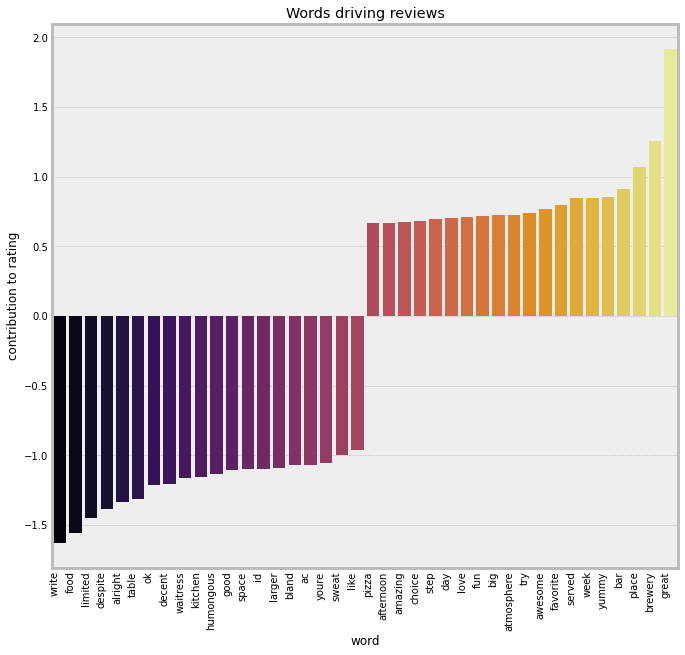

In [146]:
reviews()

for this other restaurant we can see that AC and sweat are very negative, probably the place is too hot. also waitress has a
low coefficient, probably she is not so good. pizza, burgers and chicken seems appreciated,as the beer, while 
calamari, appetizer kitchen, expectations are negative. maybe the restaurant could improve its rating
by improving its cuisine for what concerns more sophisticated dishes,change waitress and adjust the temperature.

The overfitting issue is way better now, with very high accuracy and recall also in the test set. Since we are now predicting on which words drive ratings up and down, the focus of evaluation metrics lies on the accuracy score. This is good news, but we used the third most rated restaurant. let's see how the model performs with average rated restaurants

In [147]:
#casual number
df_user_reviews["business_id"].value_counts()[200:201]

1Duul3qCnLrNak1Np-iHfw    155
Name: business_id, dtype: int64

insert business code: 1Duul3qCnLrNak1Np-iHfw
how many words?: 20
-------------------------------------------------------------------------------------------------------------

Name Business: Pita Jungle

average rating
3.8838709677419354

average standard deviation
1.0626775708587242

number of reviews
155

train - accuracy score: 0.9902912621359223
train - recall score: 0.9879518072289156
train - f1 score: 0.993939393939394

----------------
Accuracy - test
0.7884615384615384
----------------

----------------
Recall - test
0.9142857142857143
----------------

----------------
f1 - test
0.8533333333333333
----------------



,coef,features
1673,0.001332,price
1359,0.001002,menu
866,0.002003,food
1281,-0.000890,location
2082,-0.000598,staff


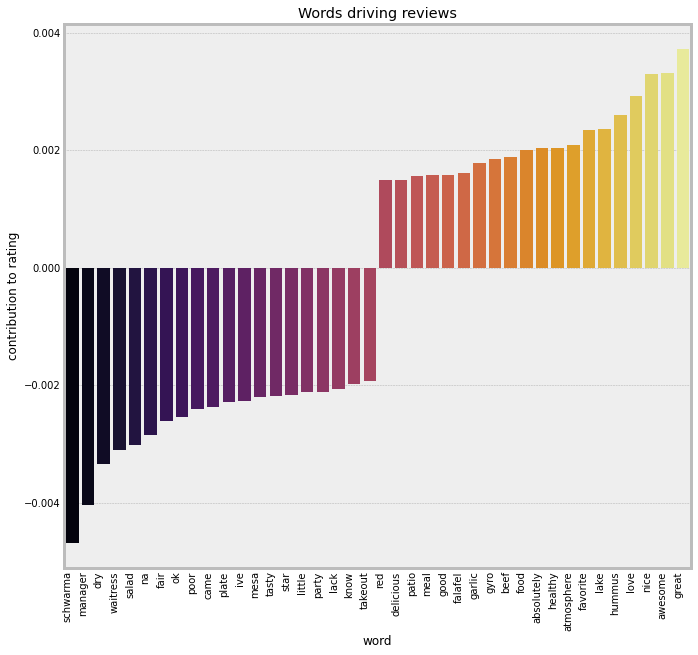

In [149]:
#1Duul3qCnLrNak1Np-iHfw    155
reviews()

Manager and waitress are very negative, this suggests bad customer service. 

In [150]:
df_user_reviews["business_id"].value_counts()[115:116]

PwxvN0SnAGPdqXdNEYVT3g    201
Name: business_id, dtype: int64

insert business code: zmFc8M-hS4uuyY0hklIpoQ
how many words?: 30
-------------------------------------------------------------------------------------------------------------

Name Business: Carly's Bistro

average rating
3.6318407960199006

average standard deviation
1.0926028988280054

number of reviews
201

train - accuracy score: 1.0
train - recall score: 1.0
train - f1 score: 1.0

----------------
Accuracy - test
0.6716417910447762
----------------

----------------
Recall - test
0.9210526315789473
----------------

----------------
f1 - test
0.7608695652173912
----------------



,coef,features
2223,-0.483143,price
1808,0.139942,menu
1160,-0.988054,food
1709,-0.131284,location
2714,0.188467,staff


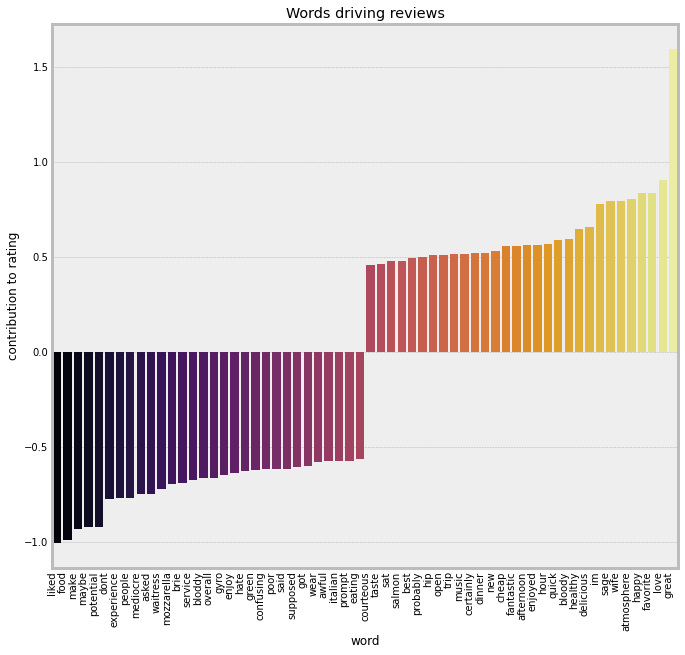

In [151]:
#zmFc8M-hS4uuyY0hklIpoQ    201
reviews()

waitress, food, service, lead us to think that there is much where this restaurant can improve

## 5.C Personalized recommender system with SVD (threshold: 30 reviews)

This example uses clients with more than 30 reviews to avoid the cold-start problem.

In [152]:
df_user_reviews.head()

,user_id,review_id,stars,date,text,type_x,business_id,votes_y,name,average_stars,review_count,type_y,reviews_per_user,cool,funny,useful
0,rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,"{'funny': 331, 'useful': 1034, 'cool': 322}",Jason,3.72,376.0,user,247.0,2,0,5
1,0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,"{'funny': 2, 'useful': 0, 'cool': 0}",Paul,5.00,2.0,user,1.0,0,0,0
2,0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,"{'funny': 0, 'useful': 3, 'cool': 0}",Nicole,4.33,3.0,user,2.0,0,0,1
3,uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,"{'funny': 18, 'useful': 75, 'cool': 36}",lindsey,4.29,31.0,user,17.0,1,0,2
4,vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,"{'funny': 3, 'useful': 32, 'cool': 8}",Roger,3.25,28.0,user,14.0,0,0,0


In [153]:
df=df_user_reviews[["user_id", "business_id", "stars"]]

In [154]:
df1=df.groupby("user_id").count().sort_values(by="stars")

In [155]:
df30=df1[df1["stars"]>30]

In [156]:
users_30=df30.reset_index()["user_id"]

In [157]:
users_30[0:5]

0    7Wr91hSKfgkKnkyhLOlwww
1    e8Ux_b9e3OGceknRqi44WA
2    8NBv8xMD1dTkM7c9TTTbeQ
3    Wj0r9VOpoIyRpaa6y5XGmA
4    yNVGe_z9hHxbvpa2Ns2JIg
Name: user_id, dtype: object

In [158]:
df30=df[df["user_id"].isin(users_30)]

In [159]:
pivot=df30.pivot_table(index="user_id", columns="business_id", values="stars")

In [160]:
pivot.dropna(how="all", axis=1, inplace=True)

In [161]:
check=pivot.copy()

In [162]:
check.head()

business_id,--5jkZ3-nUPZxUvtcbr8Uw,--BlvDO_RG2yElKu9XA1_g,-0D_CYhlD2ILkmLR0pBmnA,-0QBrNvhrPQCaeo7mTo0zQ,-0bUDim5OGuv8R0Qqq6J4A,-0xwm_AwS0d_5rwUprHGuw,-1N0Z3uM8xbxKS8XiAnaog,-1bOb2izeJBZjHC7NWxiPA,-3WVw1TNQbPBzaKCaQQ1AQ,-3xbryp44xhpN4BohxXDdQ,...,zw2iJahOnSxlzmRlF4al6g,zwHM6hz8swKIG-4-BSKMPA,zwHcKioS_8sp--GKsg0wrw,zwToyWL4dT1clsFPK9wI2w,zxjMiqlfUuIQRltSuj9FpQ,zxqvU415r_RtZRKDtdbIKQ,zyCrtvCPdSZDhUrH86vbeA,zyI8_HQPEwkJ22WMb9ILVQ,zyZ883vct64bKzNv4wy6Yg,zzucnDH33KlmbkI4rLyQTA
user_id,,,,,,,,,,,,,,,,,,,,,
--65q1FpAL_UQtVZ2PTGew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
-3HkgwyxVPf49MXM4dT8Tw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-7LfdqX286W8zJ01ljY_SQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-9mljS0O9mwdOnGv-Oea3Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Dof9NwAoQwRM-GVPZk5zw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
pivot.fillna(0, inplace=True)

In [164]:
pivot.head()

business_id,--5jkZ3-nUPZxUvtcbr8Uw,--BlvDO_RG2yElKu9XA1_g,-0D_CYhlD2ILkmLR0pBmnA,-0QBrNvhrPQCaeo7mTo0zQ,-0bUDim5OGuv8R0Qqq6J4A,-0xwm_AwS0d_5rwUprHGuw,-1N0Z3uM8xbxKS8XiAnaog,-1bOb2izeJBZjHC7NWxiPA,-3WVw1TNQbPBzaKCaQQ1AQ,-3xbryp44xhpN4BohxXDdQ,...,zw2iJahOnSxlzmRlF4al6g,zwHM6hz8swKIG-4-BSKMPA,zwHcKioS_8sp--GKsg0wrw,zwToyWL4dT1clsFPK9wI2w,zxjMiqlfUuIQRltSuj9FpQ,zxqvU415r_RtZRKDtdbIKQ,zyCrtvCPdSZDhUrH86vbeA,zyI8_HQPEwkJ22WMb9ILVQ,zyZ883vct64bKzNv4wy6Yg,zzucnDH33KlmbkI4rLyQTA
user_id,,,,,,,,,,,,,,,,,,,,,
--65q1FpAL_UQtVZ2PTGew,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
-3HkgwyxVPf49MXM4dT8Tw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-7LfdqX286W8zJ01ljY_SQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9mljS0O9mwdOnGv-Oea3Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-Dof9NwAoQwRM-GVPZk5zw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
R = pivot.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)

C:\Users\Marco\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [166]:
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error
Mean_Squared_Error=[]
for k_1 in range(1, 102, 20):
    U, sigma, Vt =svds(pivot, k=k_1)
    sigma = np.diag(sigma)
    all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
    preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot.columns)
    x=mean_squared_error(preds_df, pivot)
    Mean_Squared_Error.append(x)

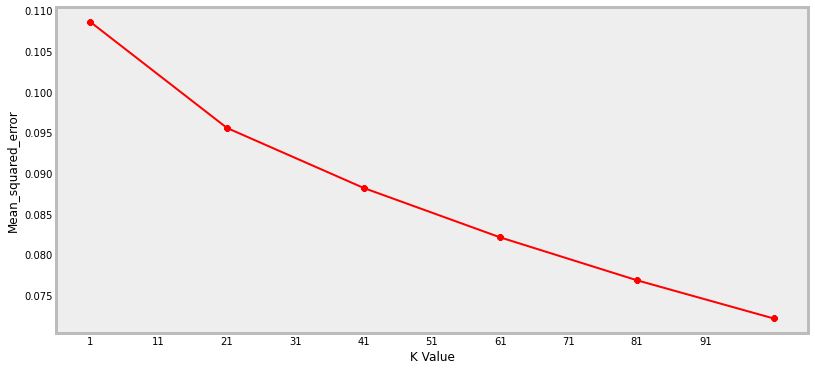

In [167]:
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,102, 20),Mean_Squared_Error, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,100,10))
plt.ylabel("Mean_squared_error")
plt.show()

In [168]:
U, sigma, Vt =svds(pivot, k=30)

In [169]:
sigma = np.diag(sigma)

In [170]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [171]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot.columns, index=pivot.reset_index()["user_id"])

In [172]:
preds_df

business_id,--5jkZ3-nUPZxUvtcbr8Uw,--BlvDO_RG2yElKu9XA1_g,-0D_CYhlD2ILkmLR0pBmnA,-0QBrNvhrPQCaeo7mTo0zQ,-0bUDim5OGuv8R0Qqq6J4A,-0xwm_AwS0d_5rwUprHGuw,-1N0Z3uM8xbxKS8XiAnaog,-1bOb2izeJBZjHC7NWxiPA,-3WVw1TNQbPBzaKCaQQ1AQ,-3xbryp44xhpN4BohxXDdQ,...,zw2iJahOnSxlzmRlF4al6g,zwHM6hz8swKIG-4-BSKMPA,zwHcKioS_8sp--GKsg0wrw,zwToyWL4dT1clsFPK9wI2w,zxjMiqlfUuIQRltSuj9FpQ,zxqvU415r_RtZRKDtdbIKQ,zyCrtvCPdSZDhUrH86vbeA,zyI8_HQPEwkJ22WMb9ILVQ,zyZ883vct64bKzNv4wy6Yg,zzucnDH33KlmbkI4rLyQTA
user_id,,,,,,,,,,,,,,,,,,,,,
--65q1FpAL_UQtVZ2PTGew,-0.027167,0.269188,0.074060,0.257241,0.032872,0.147141,0.072152,0.146924,1.314310,0.013973,...,0.216749,0.143707,0.368832,0.030432,0.109337,0.560574,0.005512,0.060540,0.194683,-0.018457
-3HkgwyxVPf49MXM4dT8Tw,0.050263,0.055852,0.016538,0.020133,0.013020,0.043305,0.011652,-0.047020,-0.240171,0.037564,...,0.040642,0.011369,0.020646,0.046807,-0.035971,0.016915,0.008832,0.015604,0.032759,-0.049813
-7LfdqX286W8zJ01ljY_SQ,0.000473,0.033931,0.010647,-0.011392,0.029758,0.034385,0.033004,0.132271,0.170717,0.095457,...,0.078746,0.031789,0.014623,-0.007586,0.034347,0.031522,0.065892,0.027367,0.014935,0.051558
-9mljS0O9mwdOnGv-Oea3Q,0.034210,0.045058,0.042973,0.063469,0.039257,0.021856,0.044508,0.266811,0.257529,0.079448,...,0.012059,0.046905,0.030659,-0.000345,0.032115,0.052529,0.063175,0.034587,0.012397,0.044561
-Dof9NwAoQwRM-GVPZk5zw,0.018293,0.046840,0.036003,-0.017462,0.024491,0.085042,0.026434,0.052922,0.273231,0.075420,...,0.072583,0.009364,-0.016406,0.114708,0.016398,-0.012262,0.054372,0.018036,-0.000670,0.080491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zfysCL-0uQNCWdGvzZ6QWA,0.002681,0.050120,0.047787,-0.002934,0.072169,0.000267,0.048486,0.310882,0.211729,0.281678,...,0.014823,0.132423,0.090171,0.205056,0.086789,0.033761,0.110837,0.062073,0.075164,0.182610
zgCO0TnkvfohTmwPTwP7Ew,0.059543,0.062038,0.032711,0.071164,0.017549,0.078790,0.077537,0.590645,0.778419,0.018506,...,0.181077,0.034536,0.119439,0.133174,0.100900,0.011398,0.125184,0.043222,0.027754,-0.007212
zhVOlwBuEgdGlHjwgVf3Jg,0.010497,0.062108,0.025113,0.060845,0.042535,0.215504,0.033758,0.018390,-0.170848,0.007817,...,0.019961,0.036785,0.039937,0.079935,0.083779,-0.098083,0.010754,0.029478,0.053704,0.023627


In [173]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

The personalized recommender system is evaluated by the mean squared error. 

In [174]:
mean_squared_error(preds_df, pivot)

0.09201997679810812

In [175]:
def predictor_SVD():
    User_Id=input("insert user Id: ")
    User_city=input("insert the city where you want to eat: ")
    User_city=User_city.capitalize()
    print(" ___________________")
    print(" |suggested for you|")
    print(" |_________________|")
    print("")
    predictions=preds_df.loc[User_Id]
    result=predictions[check.loc[User_Id].isna()].sort_values(ascending=False)[0:100]
    result_ids=pd.DataFrame(result).reset_index().business_id
    lista=pd.DataFrame()
    for ids in result_ids:
        name_business=df_restaurants[df_restaurants["business_id"]==ids][["name","city","category","stars"]]
        lista=pd.concat([lista, name_business], axis=0)
        lista=lista[lista["city"]==User_city].head()
    if len(lista)<1:
        return "sorry, no recommendations, try a different city"
    else:
        return lista

We purposely decided to filter for the city only from the first 100 restaurants suggested. This will prevent from recommending a restaurant that is probably too far from the user tastes.

In [176]:
users_30[0:5]

0    7Wr91hSKfgkKnkyhLOlwww
1    e8Ux_b9e3OGceknRqi44WA
2    8NBv8xMD1dTkM7c9TTTbeQ
3    Wj0r9VOpoIyRpaa6y5XGmA
4    yNVGe_z9hHxbvpa2Ns2JIg
Name: user_id, dtype: object

In [177]:
predictor_SVD()

insert user Id: e8Ux_b9e3OGceknRqi44WA
insert the city where you want to eat: Phoenix
 ___________________
 |suggested for you|
 |_________________|



,name,city,category,stars
8283,FEZ,Phoenix,Bars Mediterranean Nightlife Lounges American ...,4.0
6422,Matt's Big Breakfast,Phoenix,Breakfast & Brunch Restaurants,4.0
3265,Postino Arcadia,Phoenix,Wine Bars Bars Restaurants Nightlife Italian,4.5
7074,La Grande Orange Grocery,Phoenix,Food Grocery Breakfast & Brunch Restaurants,4.0
5739,Delux,Phoenix,Burgers Bars Nightlife Restaurants,4.0


In [178]:
predictor_SVD()

insert user Id: 7Wr91hSKfgkKnkyhLOlwww
insert the city where you want to eat: Phoenix
 ___________________
 |suggested for you|
 |_________________|



,name,city,category,stars
7053,Cibo,Phoenix,Italian Pizza Sandwiches Restaurants,4.5
6422,Matt's Big Breakfast,Phoenix,Breakfast & Brunch Restaurants,4.0
4676,Bobby Q,Phoenix,American (New) Barbeque Restaurants,4.5
2546,The Parlor,Phoenix,Italian Pizza Restaurants,4.0
6205,Scramble,Phoenix,Breakfast & Brunch Restaurants,4.0


The recommender system seems to work nicely in predicting the tastes, restaurants suggested follow a pattern given by the tastes of the users.

# 5.D Naive Recommender for new users

this recommender will be always available for every user and will suggest the best rated restaurants for a given city and category. While the experience is not personalized, it will help in easily finding "the best" restaurants also for new users

In [179]:
df_restaurants.head(30)

,business_id,full_address,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,type,category
4,PzOqRohWw7F7YEPBz6AubA,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",True,"[Food, Bagels, Delis, Restaurants]",Glendale Az,14,Hot Bagels & Deli,[],-112.200264,AZ,3.5,33.712797,business,Food Bagels Delis Restaurants
9,qarobAbxGSHI7ygf1f7a_Q,"891 E Baseline Rd\nSuite 102\nGilbert, AZ 85233",True,"[Sandwiches, Restaurants]",Gilbert,10,Jersey Mike's Subs,[],-111.812007,AZ,3.5,33.378839,business,Sandwiches Restaurants
11,gA5CuBxF-0CnOpGnryWJdQ,"519 W Thomas Rd\nPhoenix, AZ 85013",True,"[Mexican, Restaurants]",Phoenix,5,La Paloma Mexican Food,[],-112.081361,AZ,4.0,33.480105,business,Mexican Restaurants
13,JxVGJ9Nly2FFIs_WpJvkug,"14418 N Scottsdale Rd\nSuite 181\nScottsdale, ...",True,"[Pizza, Restaurants]",Scottsdale,55,Sauce,[],-111.926272,AZ,4.0,33.617459,business,Pizza Restaurants
17,Jj7bcQ6NDfKoz4TXwvYfMg,"8941 N Black Canyon Hwy\nPhoenix, AZ 85021",True,"[Burgers, Restaurants]",Phoenix,23,Fuddruckers,[],-112.116243,AZ,4.0,33.566989,business,Burgers Restaurants
22,yOYFhiTjT-SM4spKtDk92w,"10227 N Metro Pkwy E\nPhoenix, AZ 85051",False,"[Buffets, Dim Sum, Chinese, Restaurants]",Phoenix,42,China Chan Restaurant,[],-112.120516,AZ,3.5,33.580359,business,Buffets Dim Sum Chinese Restaurants
23,4IAzFJ159GEaIGX1-y6Bmw,"9251 E Shea Blvd\nScottsdale, AZ 85258",True,"[Burgers, Fast Food, Restaurants]",Scottsdale,3,McDonald's,[],-111.881625,AZ,2.5,33.581867,business,Burgers Fast Food Restaurants
26,MLAnvEcvDfOWELHUN_0xEw,"7001 N Scottsdale Rd\nSte 147\nScottsdale, AZ ...",False,"[Food, Breweries, American (New), Restaurants]",Scottsdale,85,Nimbus American Bistro N' Brewery,[],-111.964173,AZ,3.0,33.538847,business,Food Breweries American (New) Restaurants
29,JHp5mJvYe6UtM_QsklR-iw,"7607 E McDowell Road\nSuite 101\nScottsdale, A...",True,"[Pizza, Restaurants]",Scottsdale,9,Peter Piper Pizza,[],-111.917542,AZ,3.0,33.466126,business,Pizza Restaurants
31,sygb2W4NRadVXiWhW8bnFQ,"616 E Pima Street\nGila Bend, AZ 85337",True,"[Mexican, Restaurants]",Gila Bend,10,Sofia's Mexican Food,[],-112.711322,AZ,3.5,32.948295,business,Mexican Restaurants


In [180]:
def best_rated():
    y=input("select city: ")
    y=y.capitalize()
    df_restaurants1=df_restaurants[df_restaurants["city"]==y]
    if len(df_restaurants1)==0:
        return "no restaurants in your area :("
    else:
        general_recommender=df_restaurants1[["name","categories","stars", "review_count", "full_address"]]
        x=input("select the type of restaurant: ")
        x=x.capitalize()
        
        lista=[]
        i=0
        while i < len(general_recommender):
            if x in general_recommender.iloc[i, :]["categories"]:
                lista.append(general_recommender.iloc[i, :])
            i+=1
        lista=pd.DataFrame(lista).sort_values(by=["stars","review_count"], ascending=False).head(10)
        i=0
        nuovo=[]
        while i < len(lista):
            if lista.iloc[i,:]["review_count"]<20:
                nuovo.append("new in town")
            else:
                nuovo.append("famous in town")
            i+=1
        lista["new?"]=nuovo
        return lista
        #return lista.sort_values(by=["stars","review_count"], ascending=False).head(10)

In [181]:
best_rated()

select city: Phoenix
select the type of restaurant: Mexican


,name,categories,stars,review_count,full_address,new?
6720,Taqueria Los Yaquis,"[Fast Food, Mexican, Food Stands, Restaurants]",5.0,8,"705 W Camelback Rd\nPhoenix, AZ 85013",new in town
1071,Chi Chi's Tacos,"[Mexican, Restaurants]",5.0,5,"Phoenix, AZ 85004",new in town
6881,Tacos La Hacienda,"[Food, Mexican, Food Trucks, Restaurants]",5.0,5,"254 E Buckeye Rd\nPhoenix, AZ 85004",new in town
7634,Tacos Atoyac,"[Mexican, Restaurants]",4.5,182,"1830 W Glendale Ave\nPhoenix, AZ 85021",famous in town
1626,Sonora Mesquite Grill,"[Mexican, Restaurants]",4.5,163,"4613 E Thomas Rd\nPhoenix, AZ 85018",famous in town
954,Rito's Market & Mexican Take Out,"[Mexican, Restaurants]",4.5,107,"907 N 14th St\nPhoenix, AZ 85006",famous in town
10481,Mariscos Playa Hermosa,"[Seafood, Mexican, Restaurants]",4.5,84,"1605 E Garfield St\nPhoenix, AZ 85006",famous in town
5296,Paradise Valley Burger Company,"[Burgers, American (Traditional), Mexican, Res...",4.5,69,"4001 E Bell Rd\nSte 102\nPhoenix, AZ 85032",famous in town
2093,Tacos Sahuayo,"[Mexican, Restaurants]",4.5,14,"2320 N 32nd St\nPhoenix, AZ 85008",new in town
4863,Asadero Torro,"[Mexican, Restaurants]",4.5,12,"1715 W McDowell Rd\nPhoenix, AZ 85007",new in town


In [182]:
best_rated()

select city: Phoenix
select the type of restaurant: italian


,name,categories,stars,review_count,full_address,new?
6642,Bar Crudo,"[Italian, Bars, American (Traditional), Nightl...",5.0,7,"3603 E Indian School Rd\nSte B\nPhoenix, AZ 85018",new in town
4760,Sano Brick Pizza,"[Restaurants, Pizza, Italian]",5.0,4,"2170 E Baseline Rd\nSte 134\nPhoenix, AZ 85042",new in town
7053,Cibo,"[Italian, Pizza, Sandwiches, Restaurants]",4.5,594,"603 N 5th Ave\nPhoenix, AZ 85003",famous in town
3265,Postino Arcadia,"[Wine Bars, Bars, Restaurants, Nightlife, Ital...",4.5,575,"3939 E Campbell Ave\nPhoenix, AZ 85018",famous in town
1028,Postino Central,"[Wine Bars, Bars, Restaurants, Nightlife, Ital...",4.5,402,"5144 N Central Ave\nPhoenix, AZ 85012",famous in town
10552,Pane Bianco,"[Pizza, Italian, Sandwiches, Restaurants]",4.5,278,"4404 N Central Ave\nPhoenix, AZ 85012",famous in town
290,Pizza A Metro,"[Restaurants, Pizza, Italian]",4.5,193,"2336 W Thomas Rd\nPhoenix, AZ 85015",famous in town
4993,Spinato's Pizza,"[Italian, Pizza, Sandwiches, Restaurants]",4.5,119,"1219 E Glendale Ave\nSte 14\nPhoenix, AZ 85020",famous in town
8752,Spinato's Pizza,"[Italian, Pizza, Restaurants]",4.5,105,"1614 E Bell Rd\nPhoenix, AZ 85022",famous in town
7569,Roma Garden Ristorante,"[Restaurants, Italian]",4.5,71,"3923 E Thunderbird Rd\nSte 113\nPhoenix, AZ 85032",famous in town


the rational behind this kind of recommender is: if you have a new business, even if you have few very positive rates (first Mexican restaurant has only 8 rates), you have visibility for a while, until you receive an average rate that lowers your rating, so that the perfect score of 5 is compromised and other restaurants with equal stars but more reviews (more reliable) are before you. The purpose is to give visibility for a while to high level, new restaurants, making them increase their reviews, allowing yelp to improve the report given by the sentiment analysis. The user will be notified if the restaurant suggested is new or not based on number of reviews

# 6. Conclusion

## 6.A Implications of the model results

So far we can use the results obtained in our models to foster yelp's business in two ways. 

1. An effective recommender system will increase traffic on the website and the discount in exchange for reviews will increase retention rate of users. Both will help to increase revenues from ads on the website.

2. The predictions on how certain words in reviews will affect ratings can be used to create different level data reports which can be sold to restaurants. This will assure engagement from the business side of yelp's platform and represent an additional stream of revenue for yelp's business. 

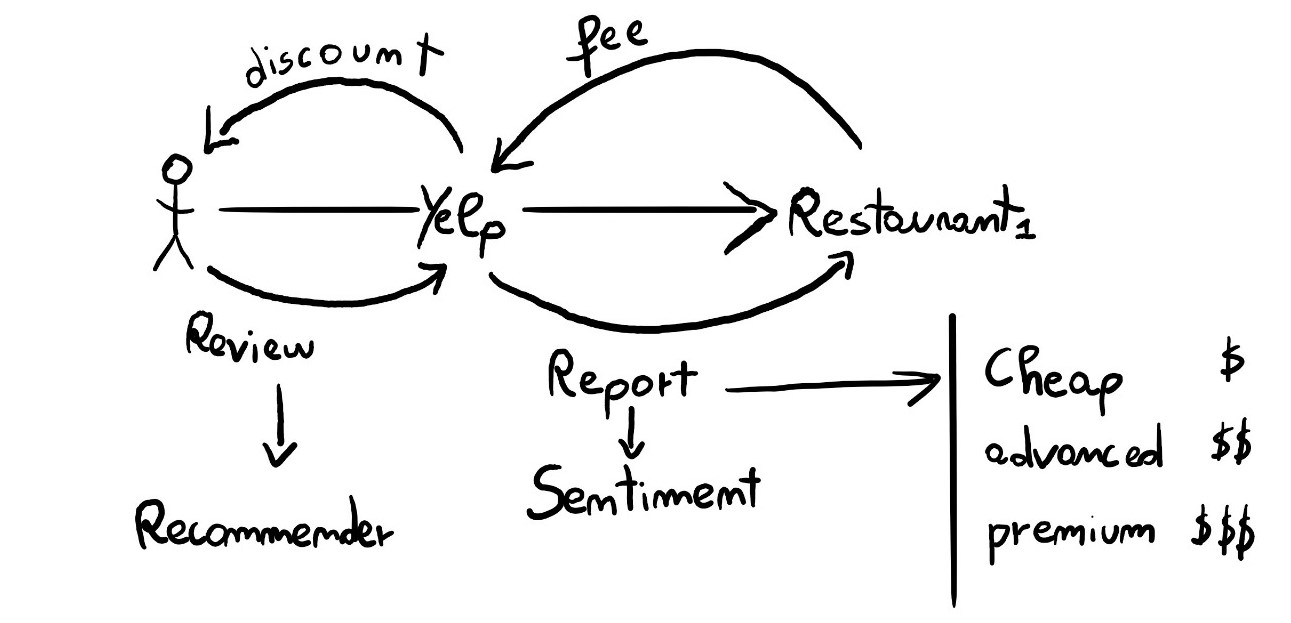

In [183]:
from PIL import Image

myImage = Image.open("plan.jpeg")
myImage

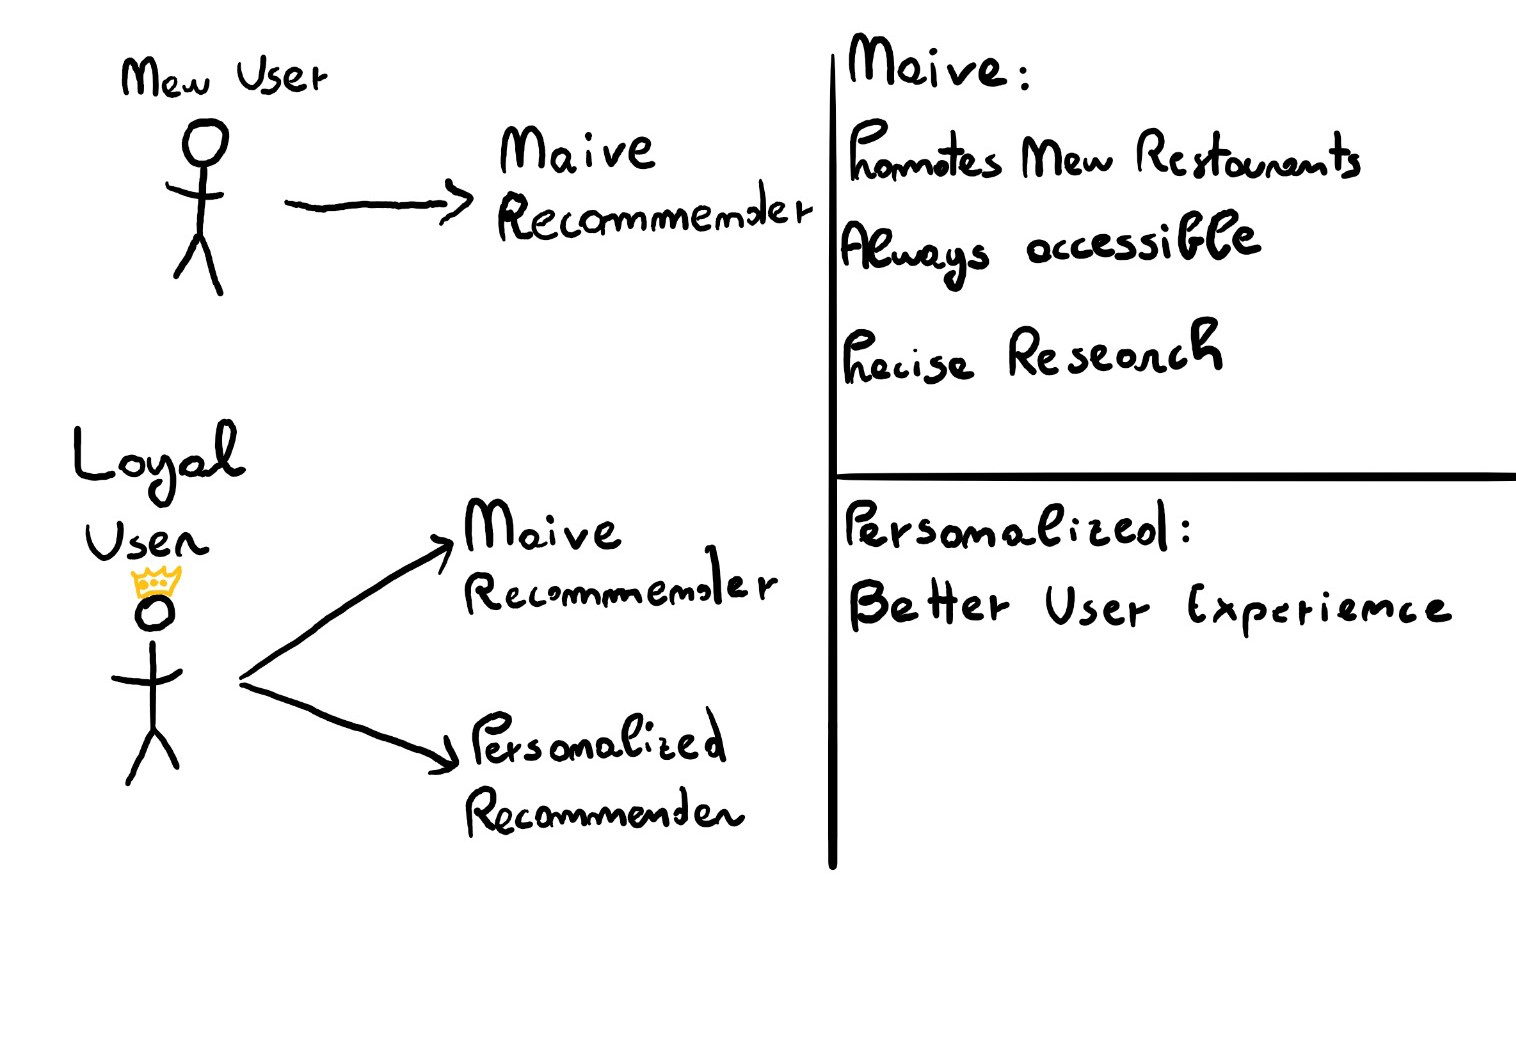

In [184]:
myImage = Image.open("recommenders.jpeg")
myImage

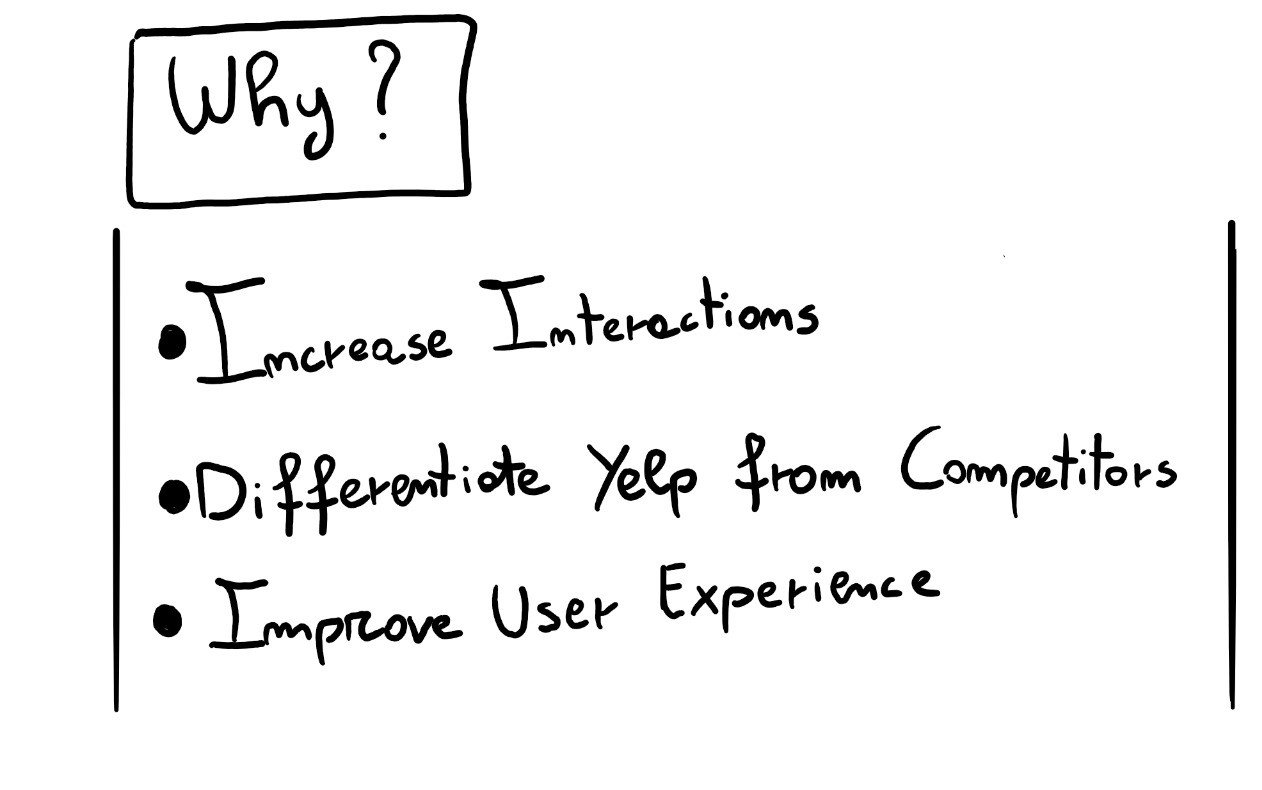

In [185]:
myImage = Image.open("why.jpeg")
myImage

## B. Going forward from here

In the future, yelp could further leverage the models that predict star ratings from review content and apply them to other business listed on their platform outside of the hospitality sector. The models are quite scalable and reports with different levels of detail can be sold to all businesses on the platform. 

In the following we proposed an example how extra data can improve yelp's business performance. Here, it is not about which additional data can help to establish more meaningful recommender systems and sentiment analysis, it is actually about how the data is collected. For example, asking the user what he liked most about his dinner at the restaurant and similtanously suggestion fixed answers, we can obtain useful and clean features. See the example blow.

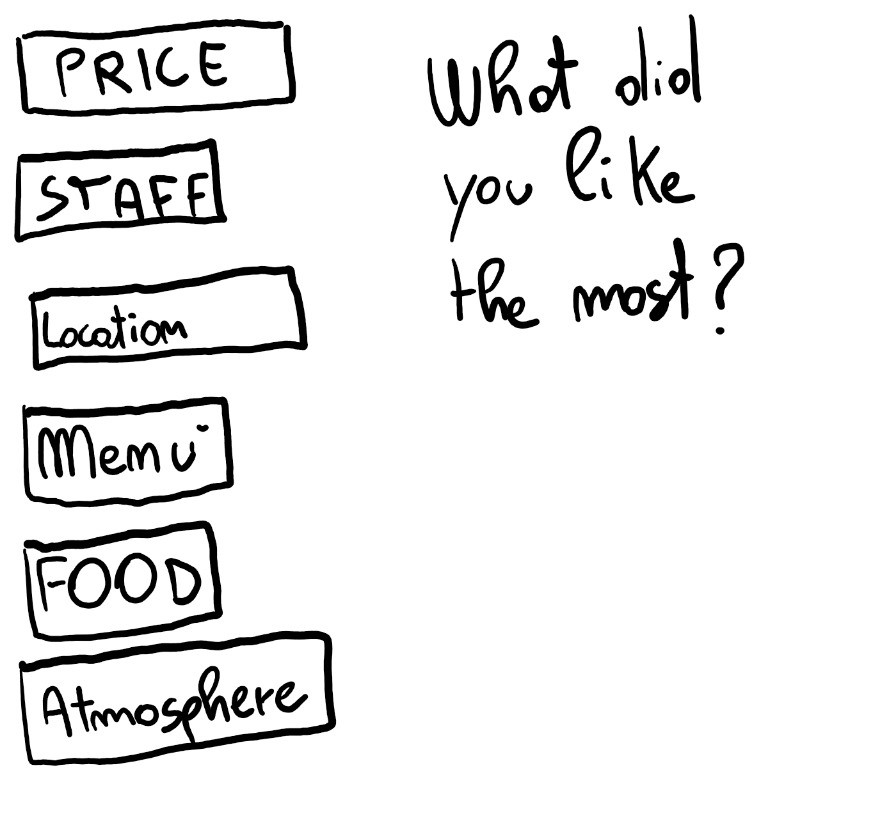

In [186]:
myImage = Image.open("finalimagesug.jpeg")
myImage